# Timeseries forcasting store item Sales

In [2]:
import pandas as pd
import numpy as np

import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

import datetime
from pathlib import Path
import random
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import itertools

import pickle
import warnings

! pip install pmdarima

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading csv file

In [5]:
train_csv_file_path = '/content/drive/MyDrive/PredictiveAnalytics/train.csv'
df_train = pd.read_csv(train_csv_file_path)
test_csv_file_path = '/content/drive/MyDrive/PredictiveAnalytics/test.csv'
df_test = pd.read_csv(test_csv_file_path)

## Preliminary Data Analysis

In [6]:
df_train.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [7]:
df_train.info() # Train CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [8]:
df_test.head()

id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1

In [9]:
df_test.info() #Test CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [10]:
#type casting date to datetime and item & Store to string
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['item'] = df_train['item'].astype(str)
df_train['store'] = df_train['store'].astype(str)

In [11]:
df_train.head()

date store item  sales
0 2013-01-01     1    1     13
1 2013-01-02     1    1     11
2 2013-01-03     1    1     14
3 2013-01-04     1    1     13
4 2013-01-05     1    1     10

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  object        
 2   item    913000 non-null  object        
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 27.9+ MB


In [13]:
print(df_train.describe())

               sales
count  913000.000000
mean       52.250287
std        28.801144
min         0.000000
25%        30.000000
50%        47.000000
75%        70.000000
max       231.000000


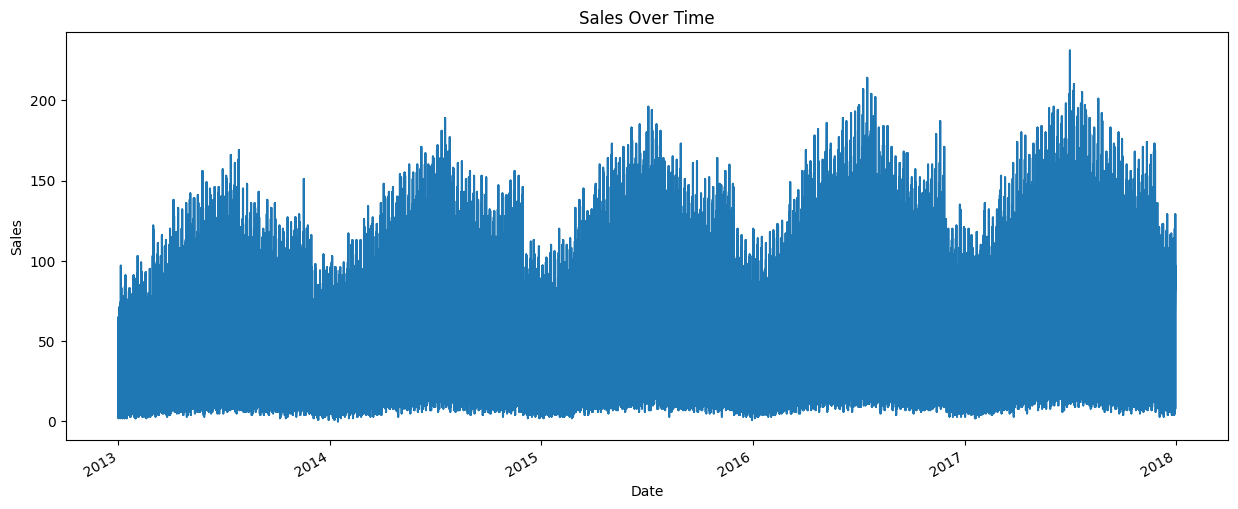

In [14]:
#checking data over time
df_sales = df_train.copy()
df_sales.set_index('date', inplace=True)

# Plot sales over time
plt.figure(figsize=(15, 6))
df_sales['sales'].plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [15]:
df_train.head()

date store item  sales
0 2013-01-01     1    1     13
1 2013-01-02     1    1     11
2 2013-01-03     1    1     14
3 2013-01-04     1    1     13
4 2013-01-05     1    1     10

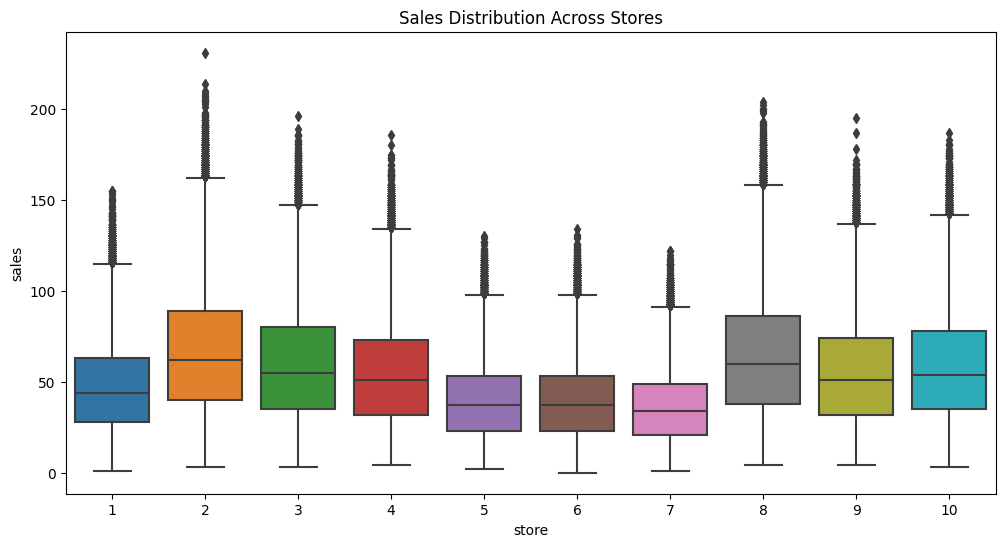

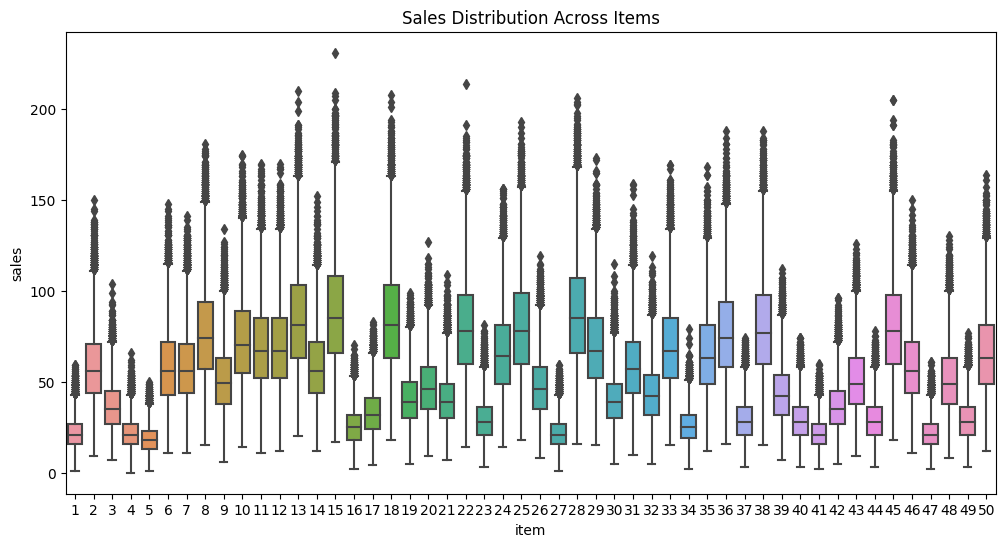

In [16]:
#Distribution of sales across different stores and items

# Boxplot of sales for each store
plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='sales', data=df_train)
plt.title('Sales Distribution Across Stores')
plt.show()

# Boxplot of sales for each item
plt.figure(figsize=(12, 6))
sns.boxplot(x='item', y='sales', data=df_train)
plt.title('Sales Distribution Across Items')
plt.show()

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


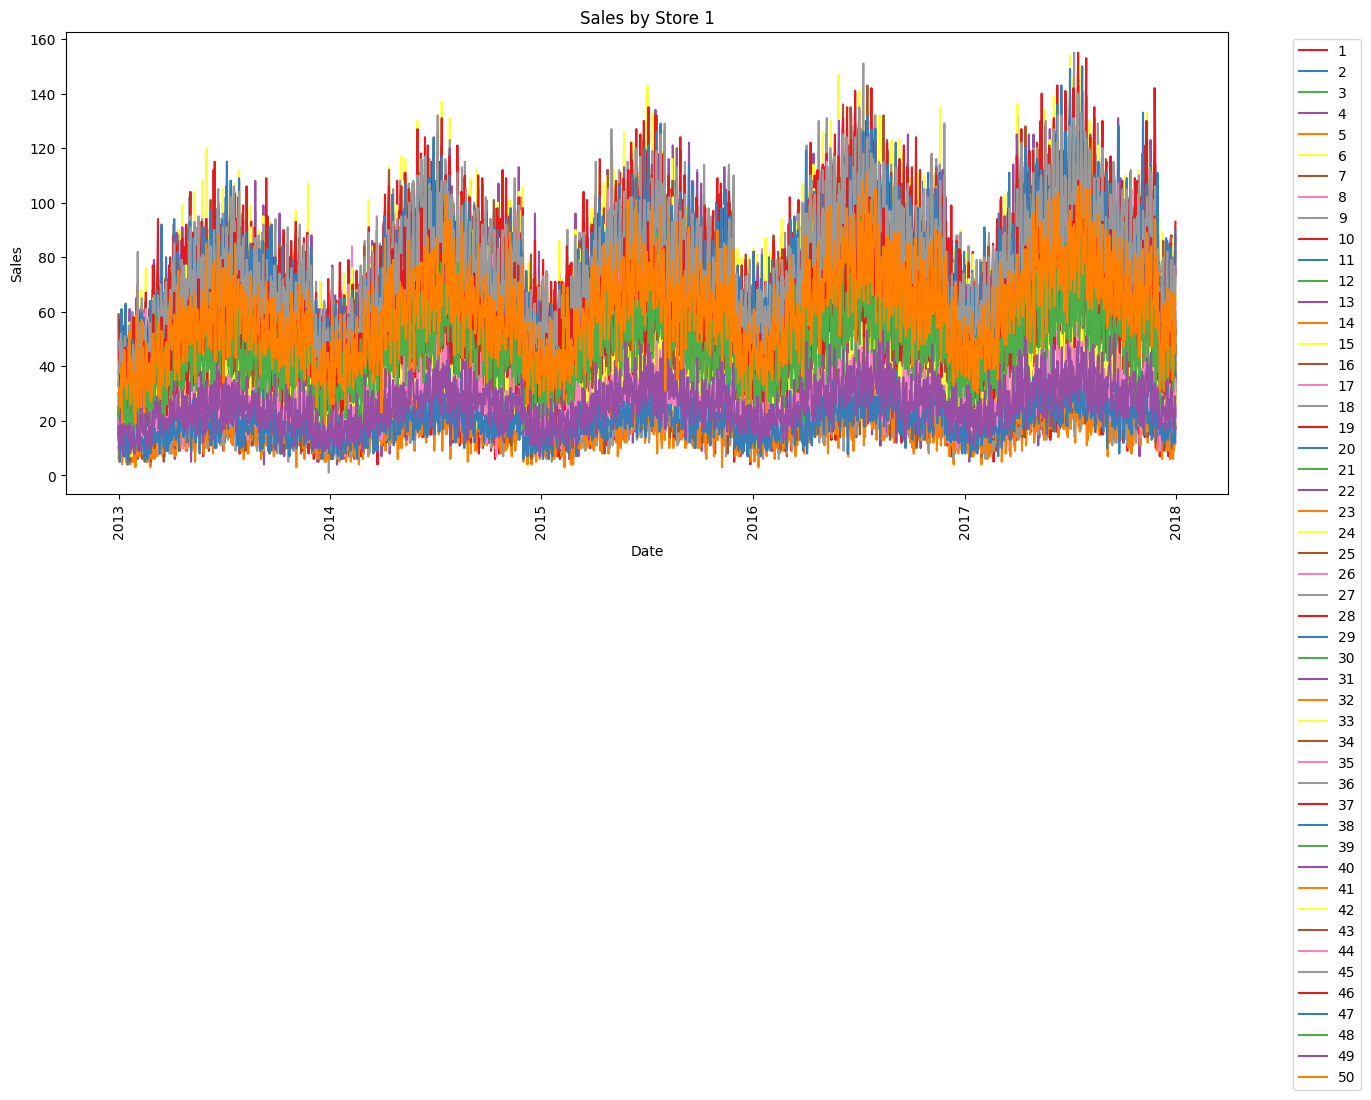

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


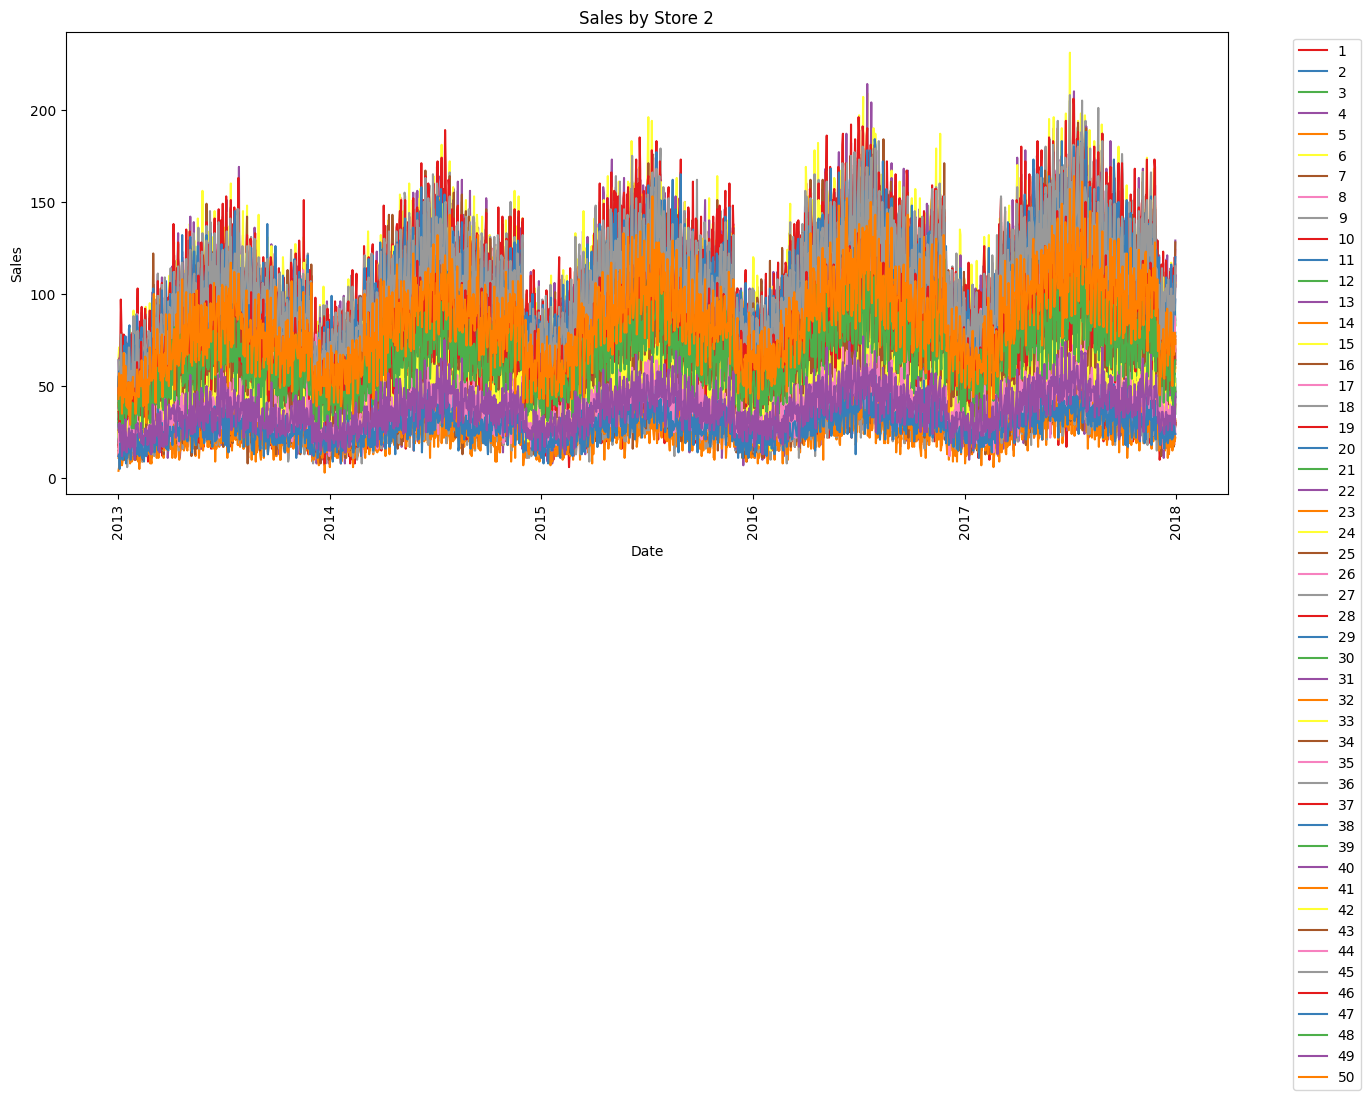

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


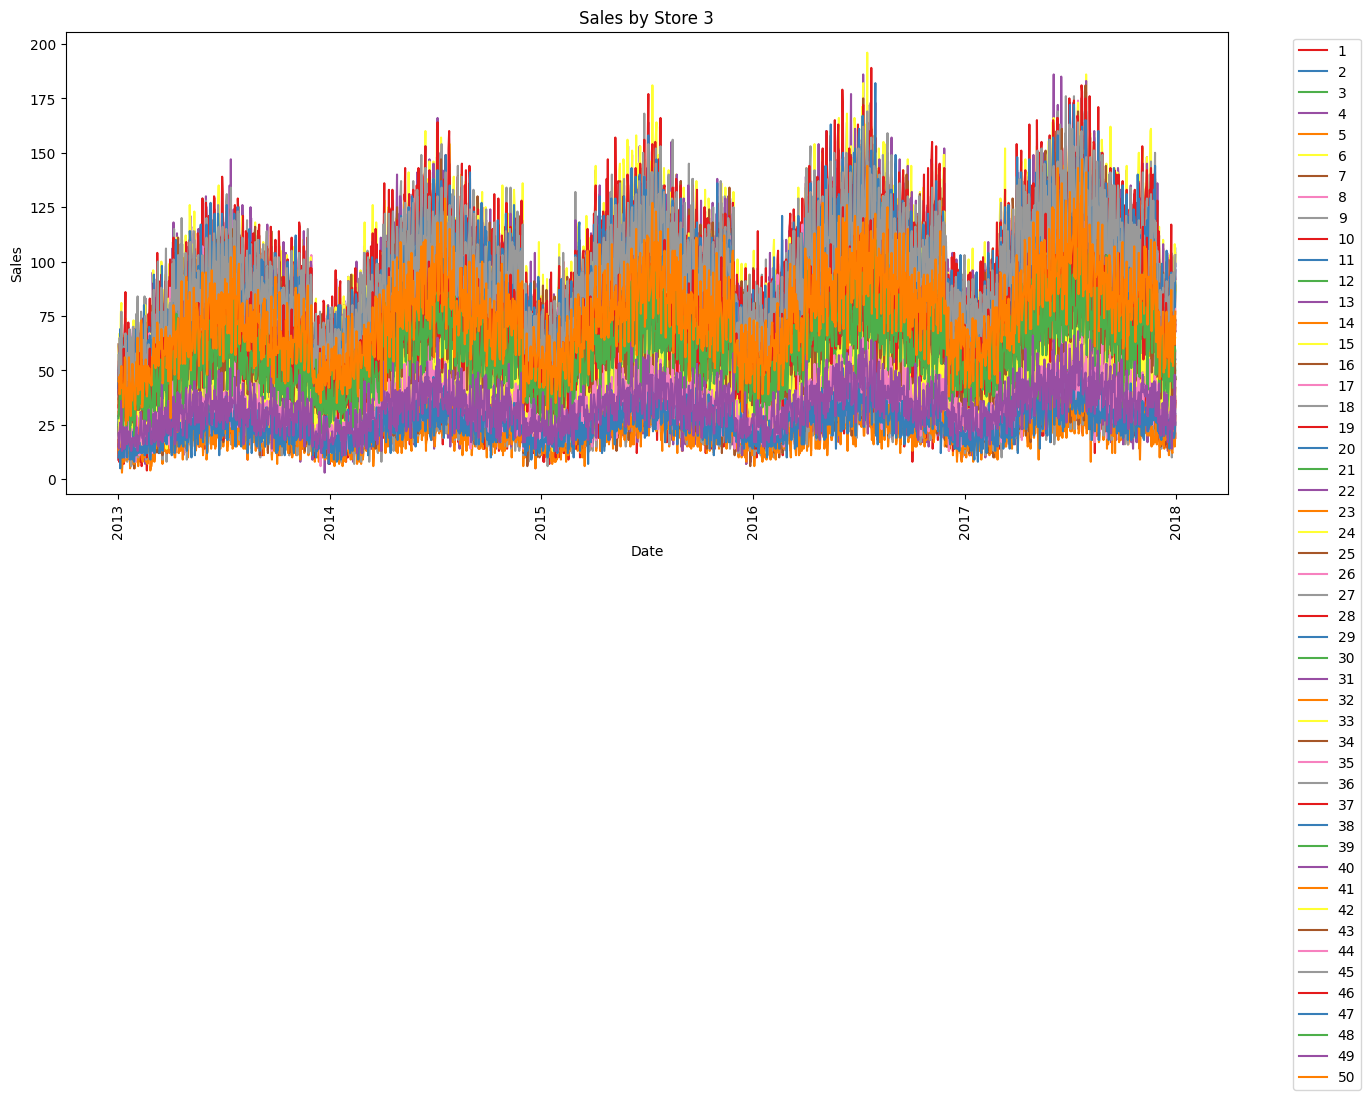

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


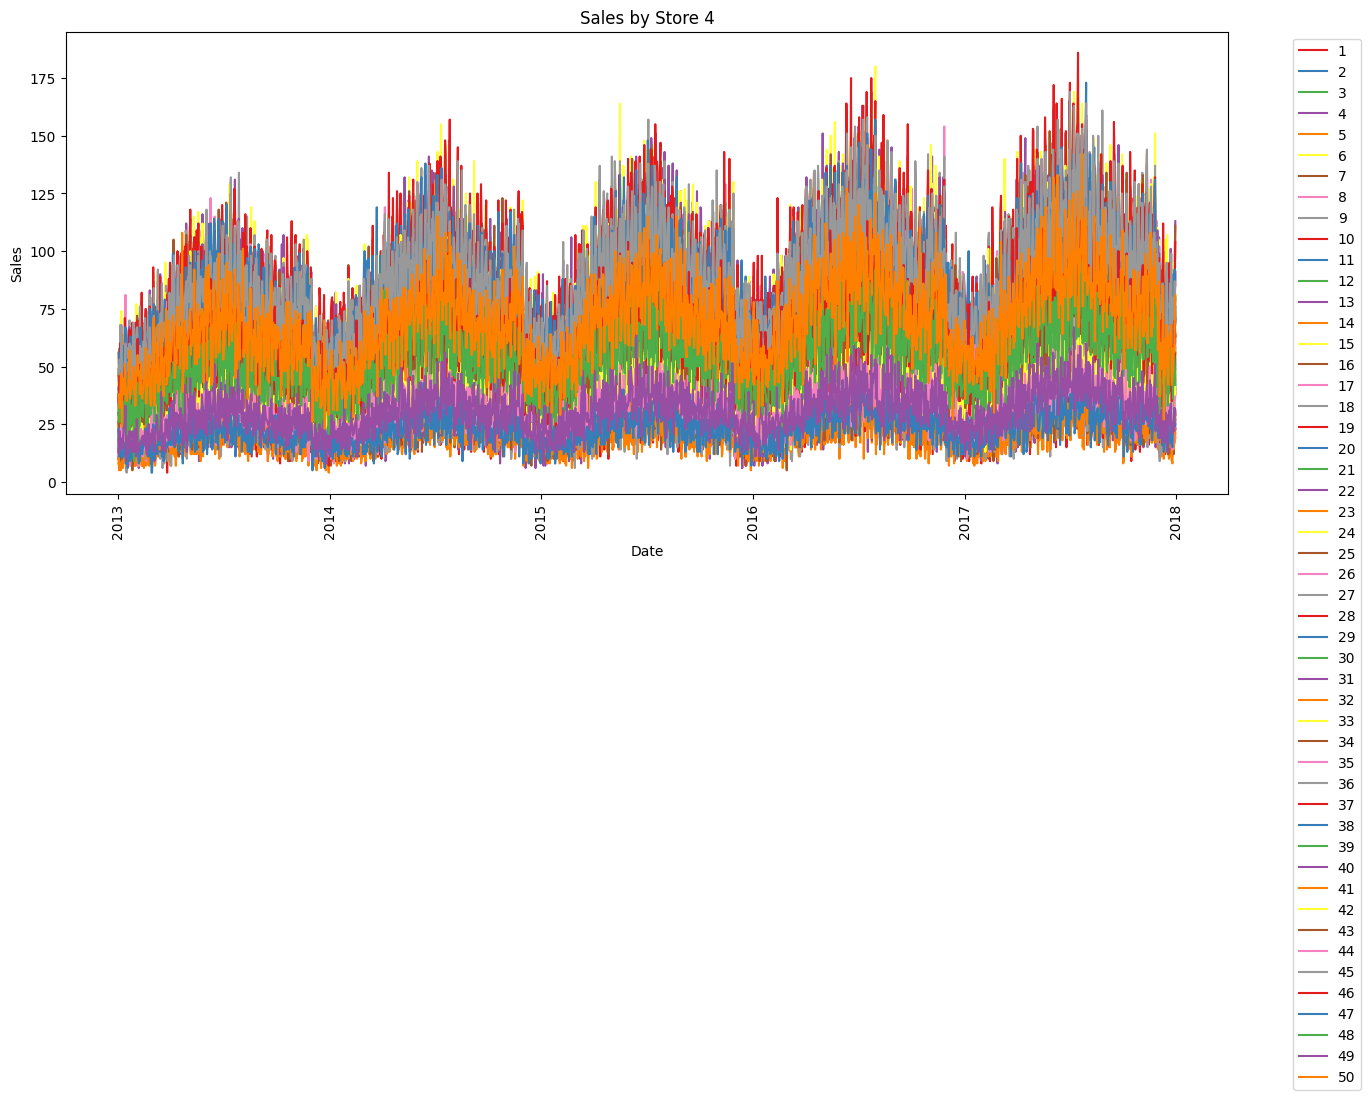

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


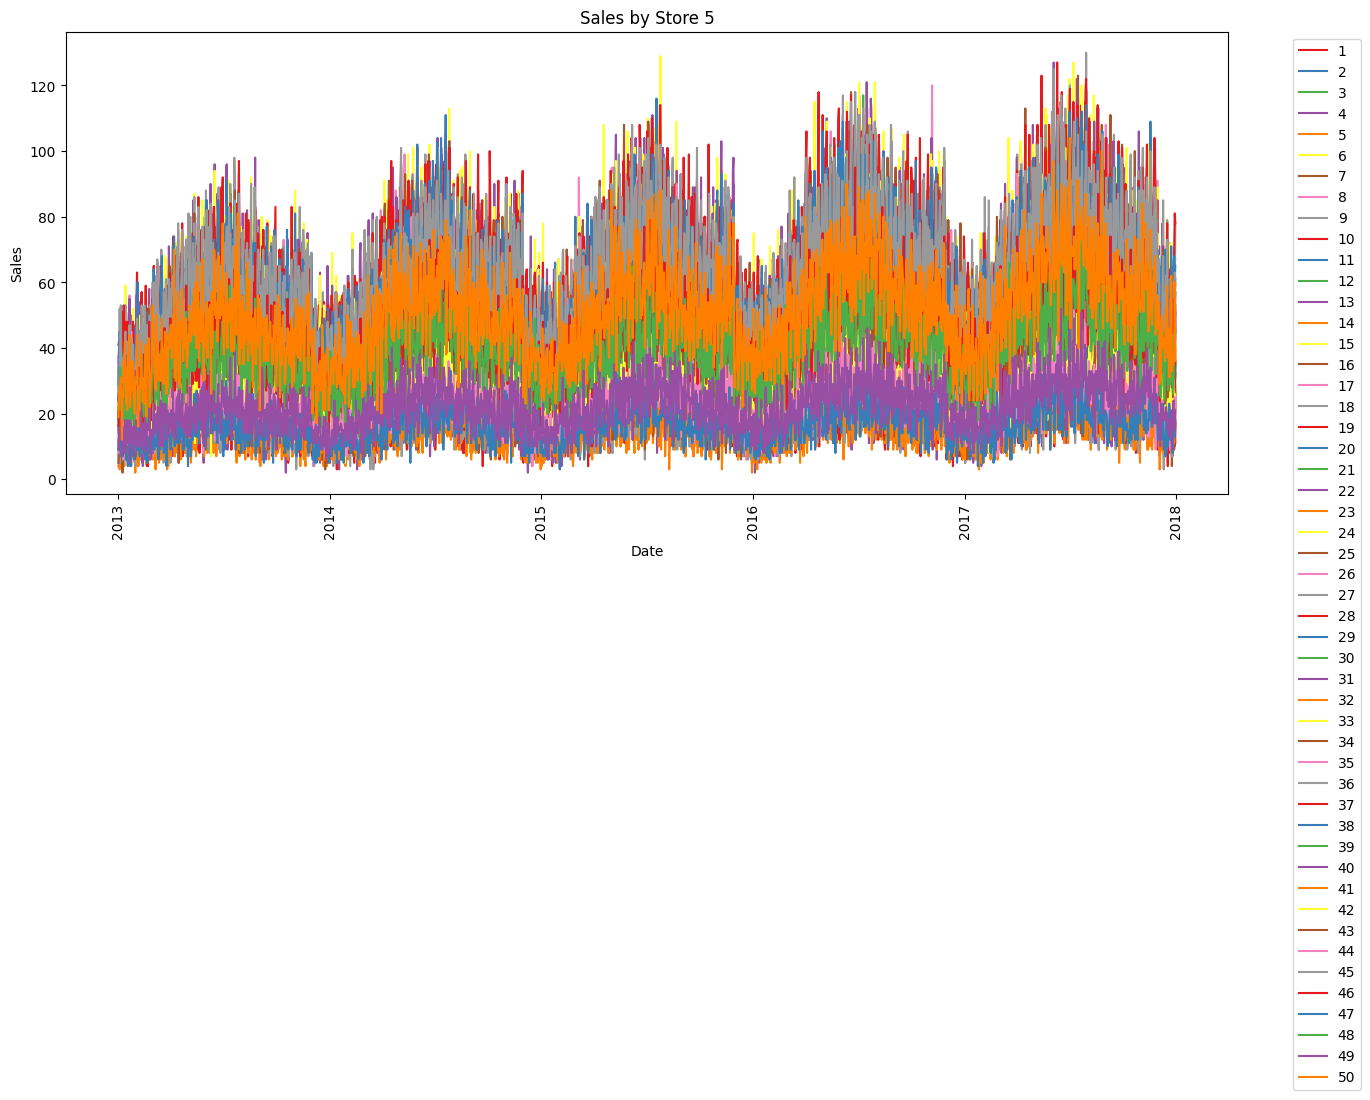

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


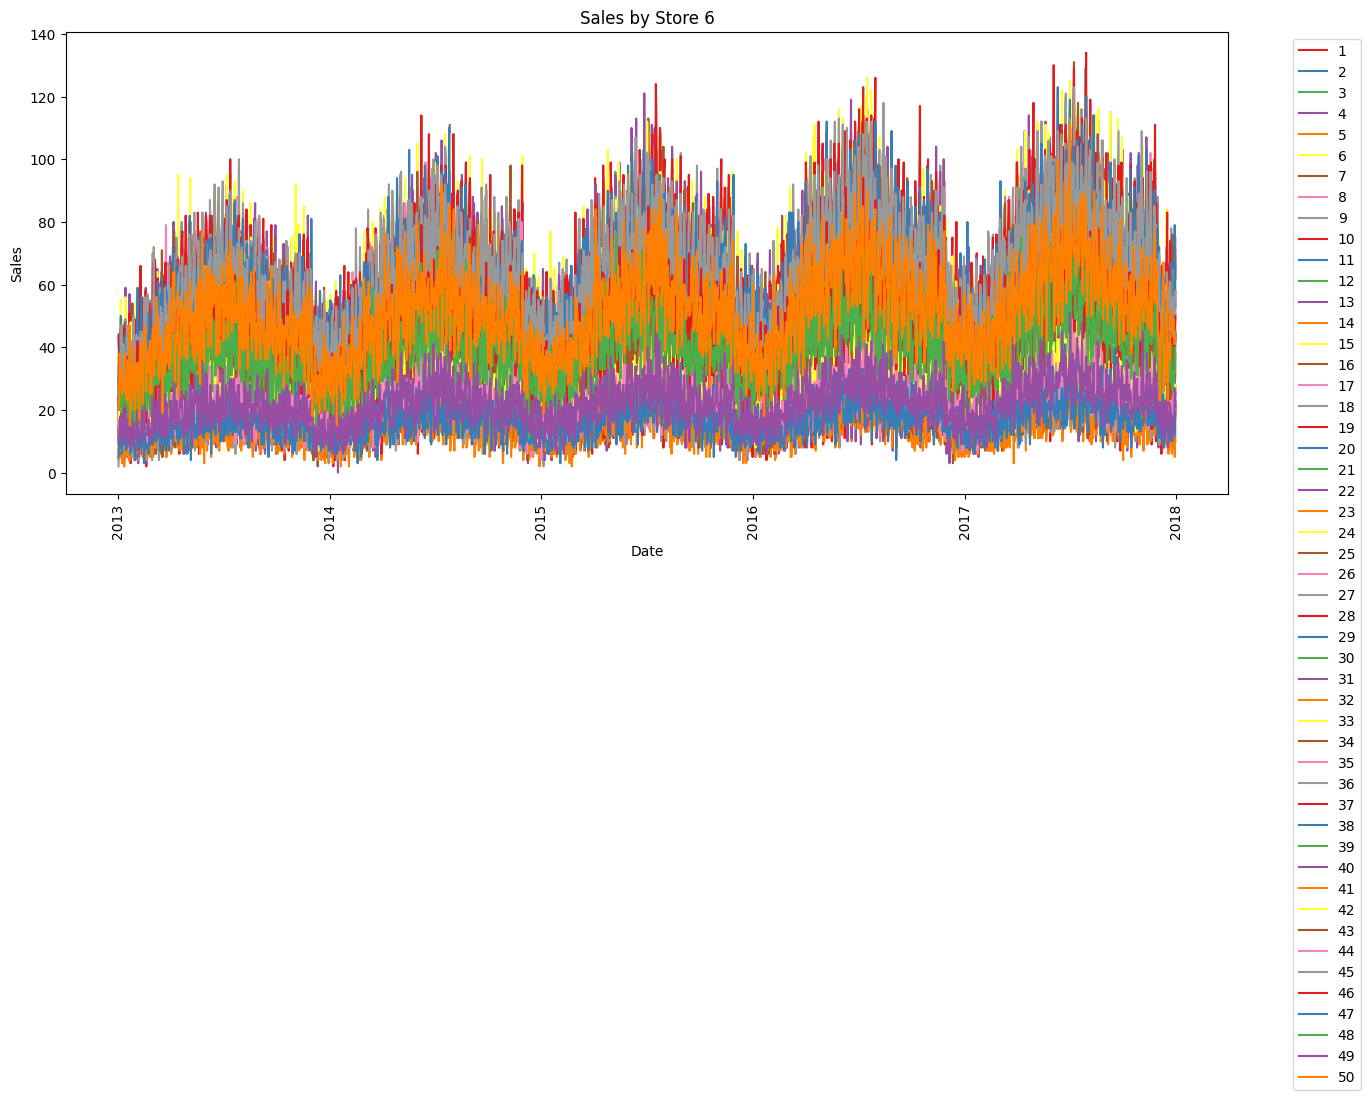

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


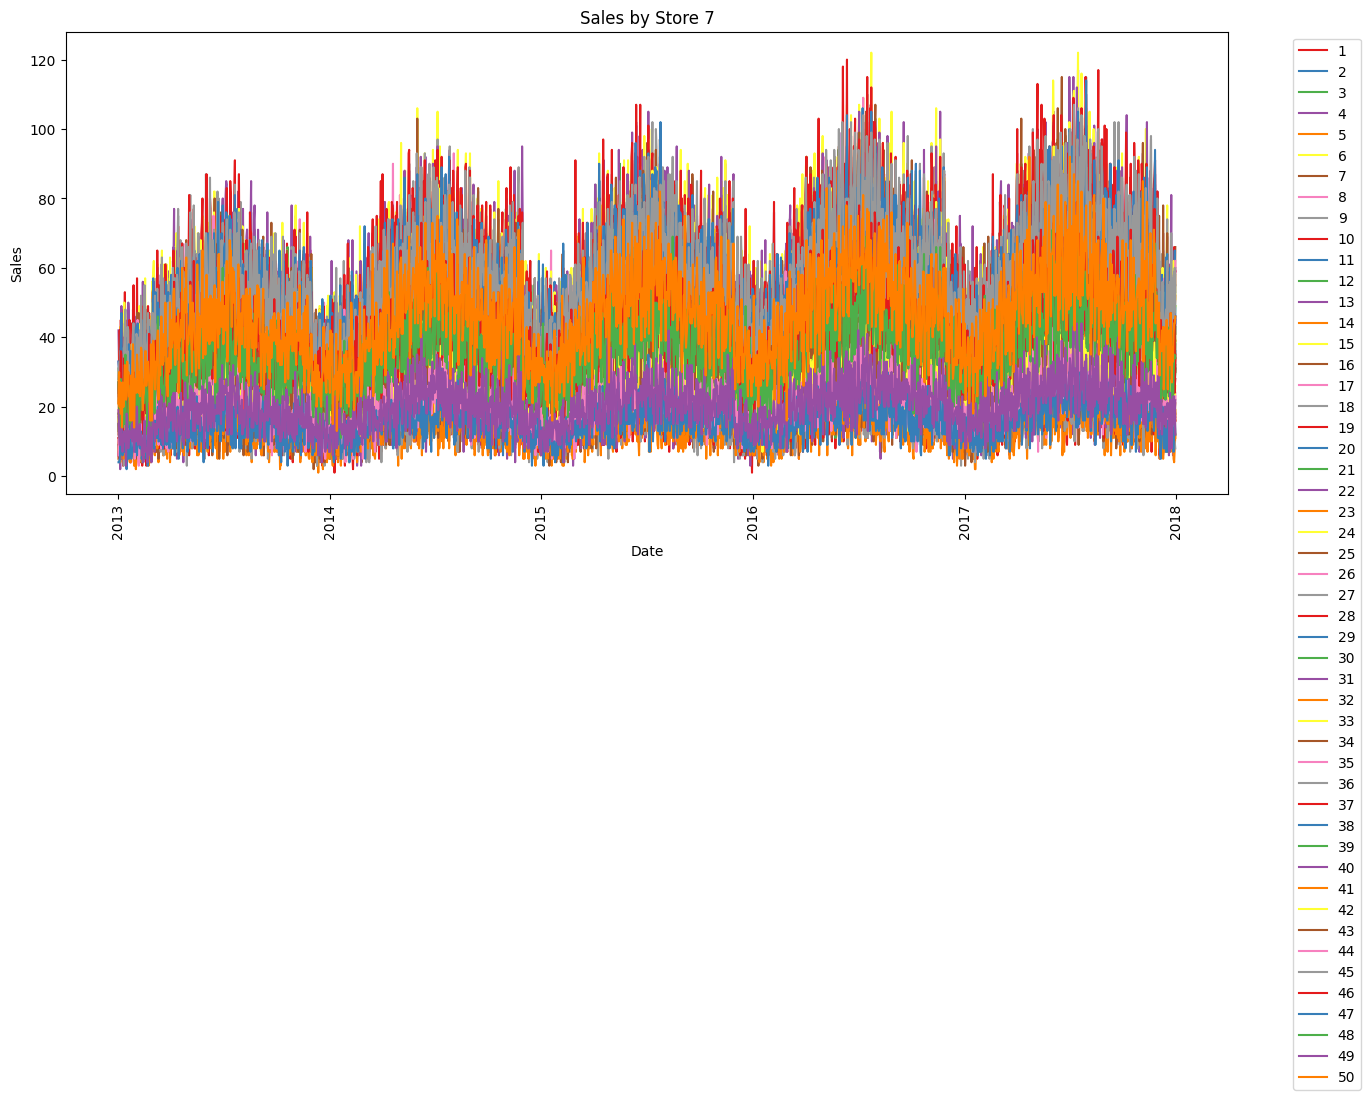

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


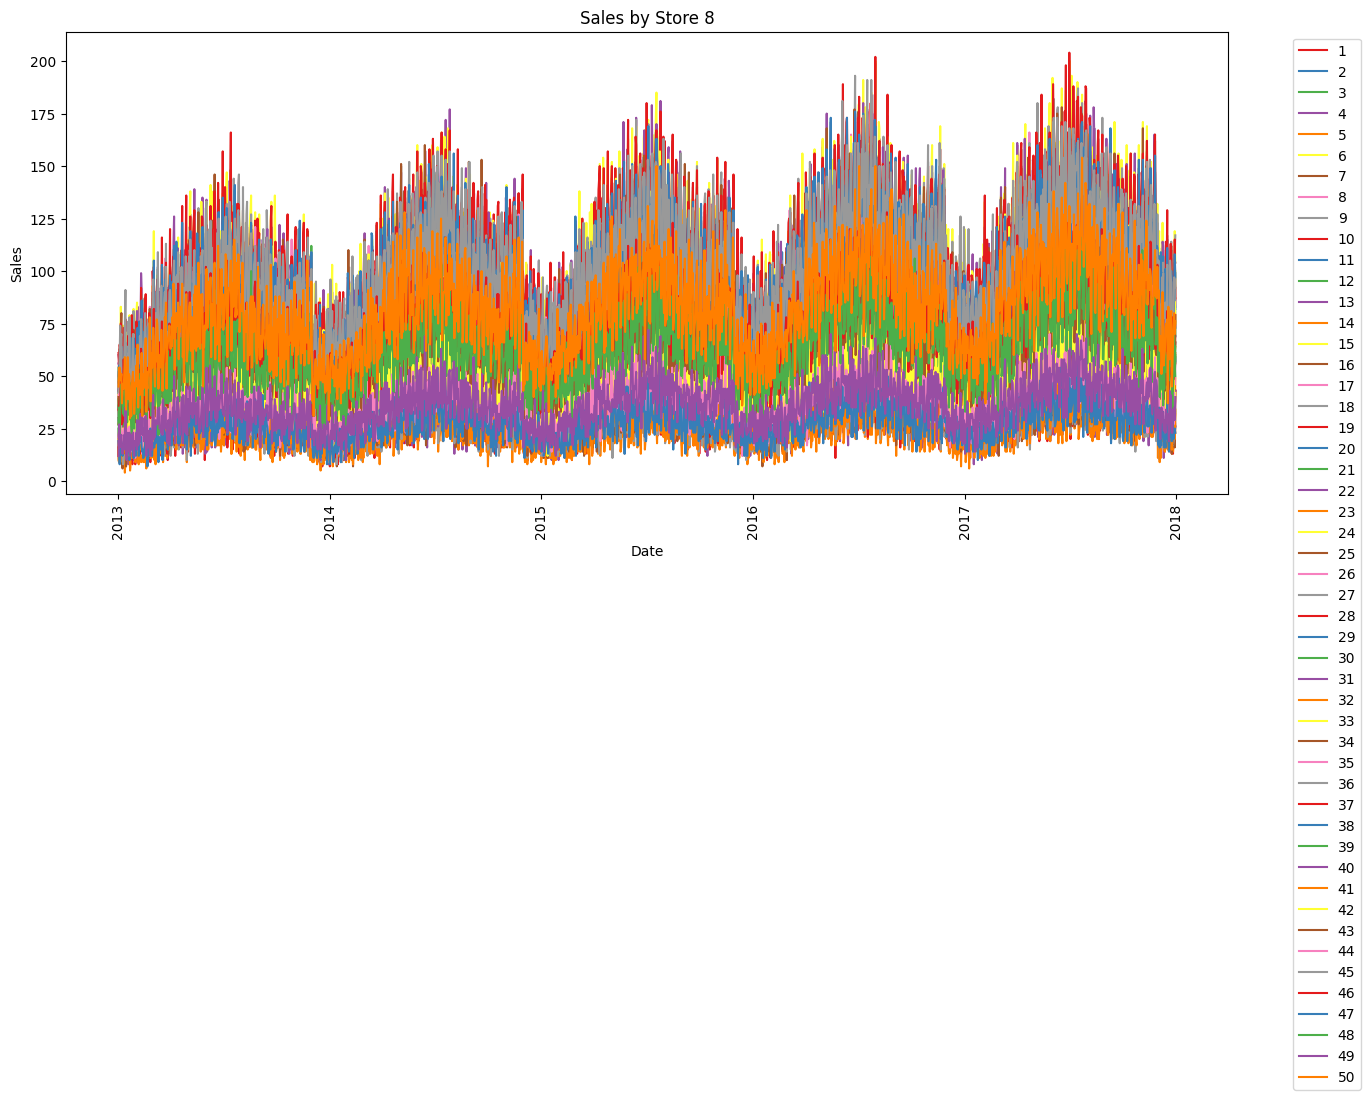

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


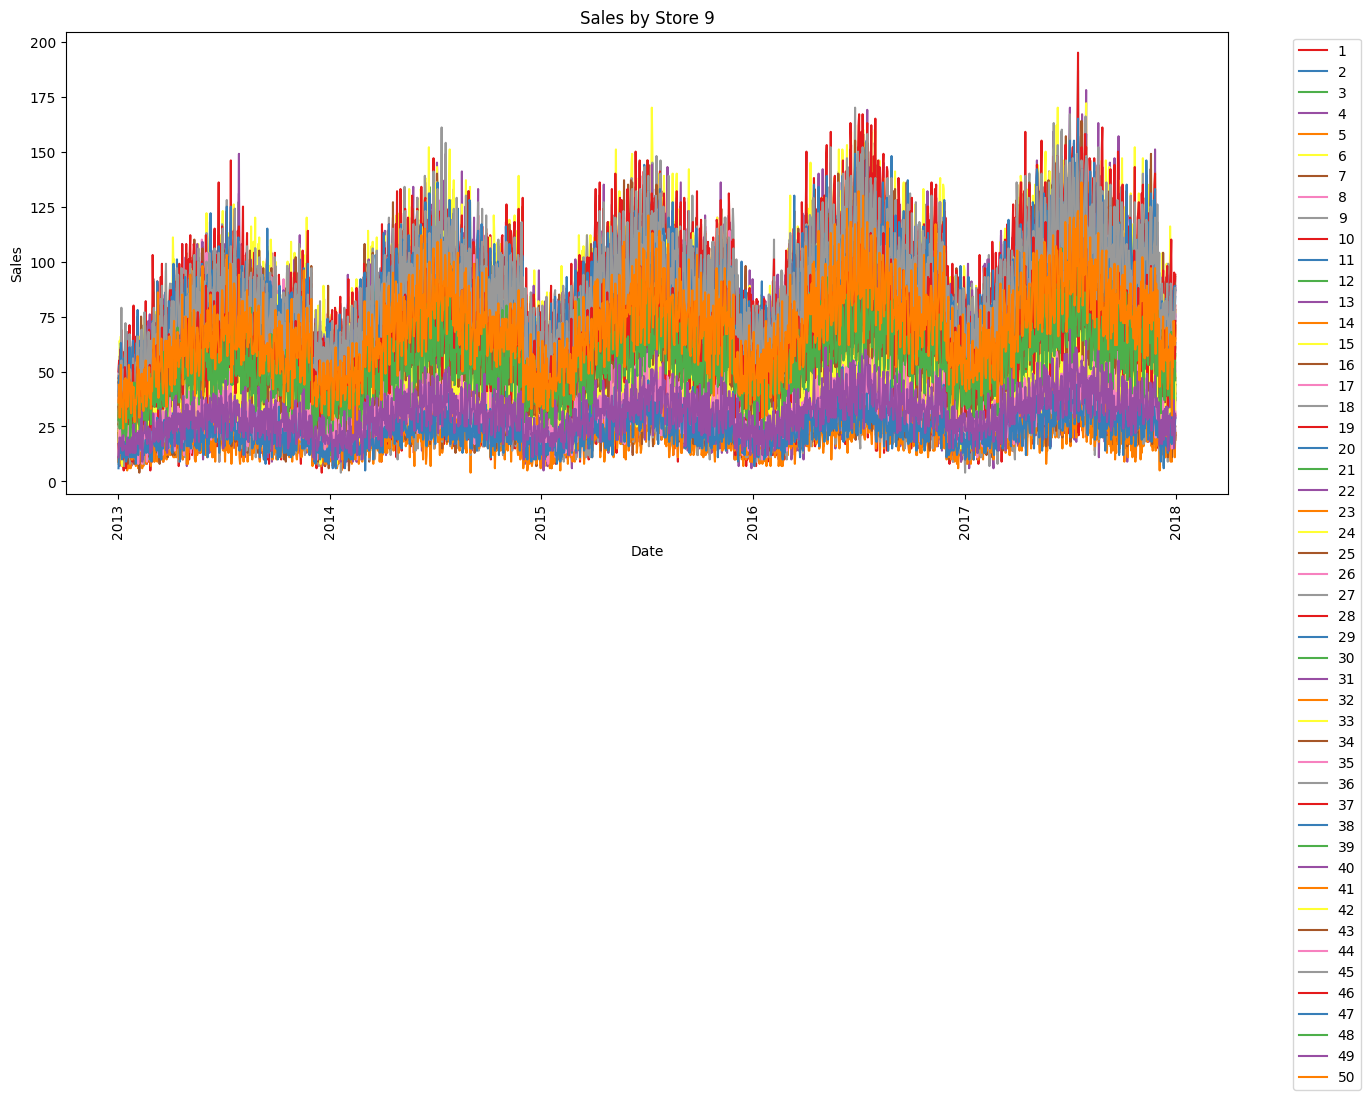

<ipython-input-17-d0b2f4d10a56>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


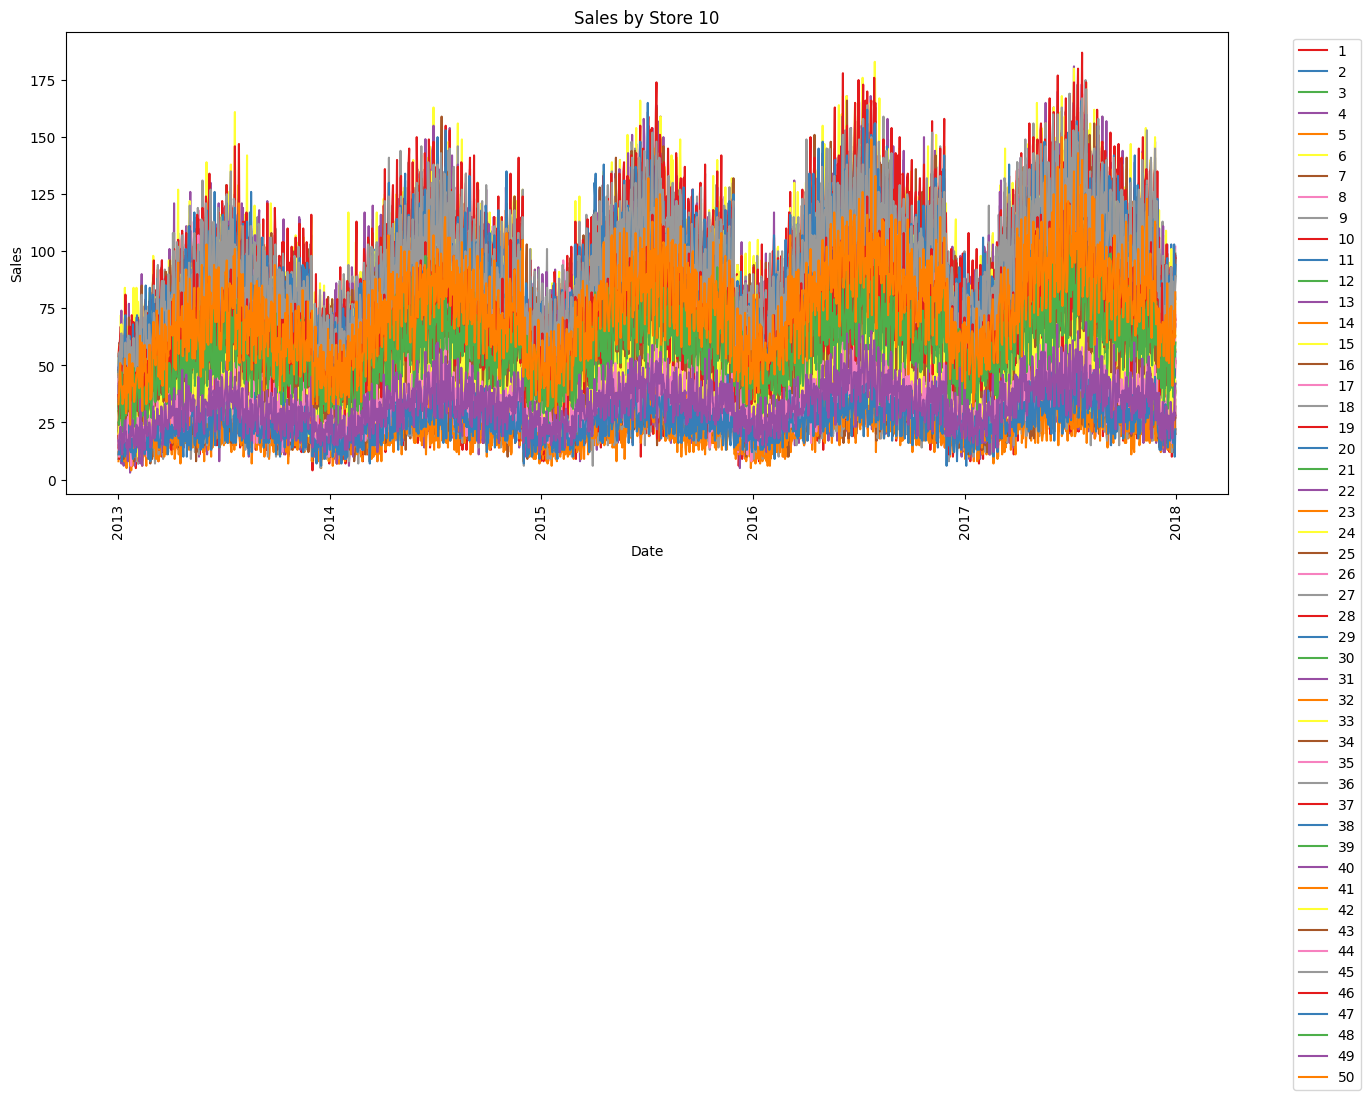

In [17]:
# Getting unique items and stores
for store in df_train['store'].unique():
    df_temp = df_train[df_train['store'] == store]

    plt.figure(figsize=[15, 6])
    plt.title(f'Sales by Store {store}')
    sns.lineplot(x='date',
                 y='sales',
                 hue='item',
                 data=df_temp,
                 palette='Set1')

    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [18]:
# Grouping by date and item to get daily sales
df = df_train.groupby(['date', 'item'])['sales'].sum().reset_index()
df.head()


date item  sales
0 2013-01-01    1    133
1 2013-01-01   10    378
2 2013-01-01   11    369
3 2013-01-01   12    369
4 2013-01-01   13    444

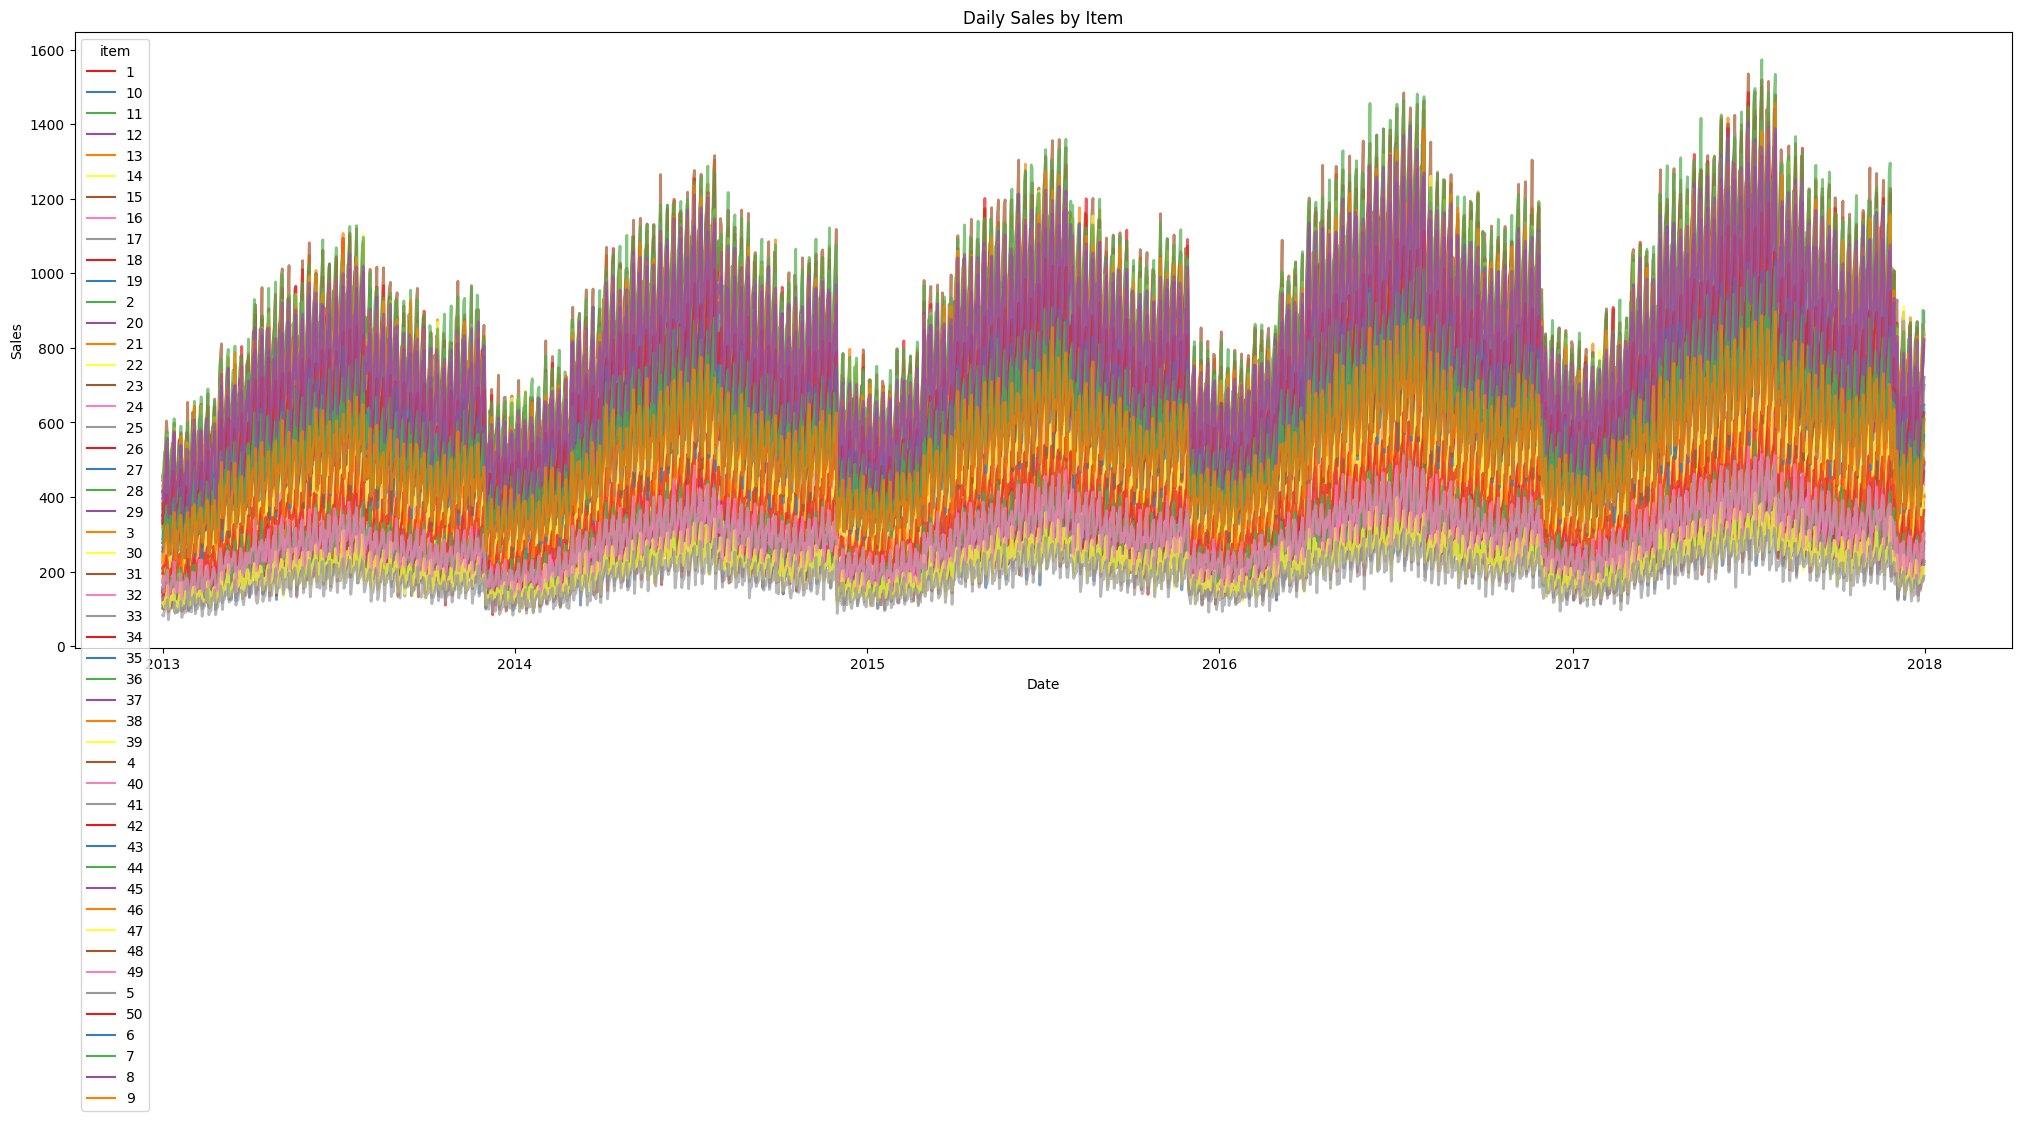

In [19]:
plt.figure(figsize = [25, 8])
sns.lineplot(x='date', y='sales', hue='item', data=df, palette='Set1', linewidth=2, alpha=0.7)
plt.title('Daily Sales by Item')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='item', loc='upper left')

In [20]:
df = df_train.groupby(['date', 'store'])['sales'].sum().reset_index()
df.head()

date store  sales
0 2013-01-01     1   1316
1 2013-01-01    10   1521
2 2013-01-01     2   1742
3 2013-01-01     3   1588
4 2013-01-01     4   1423

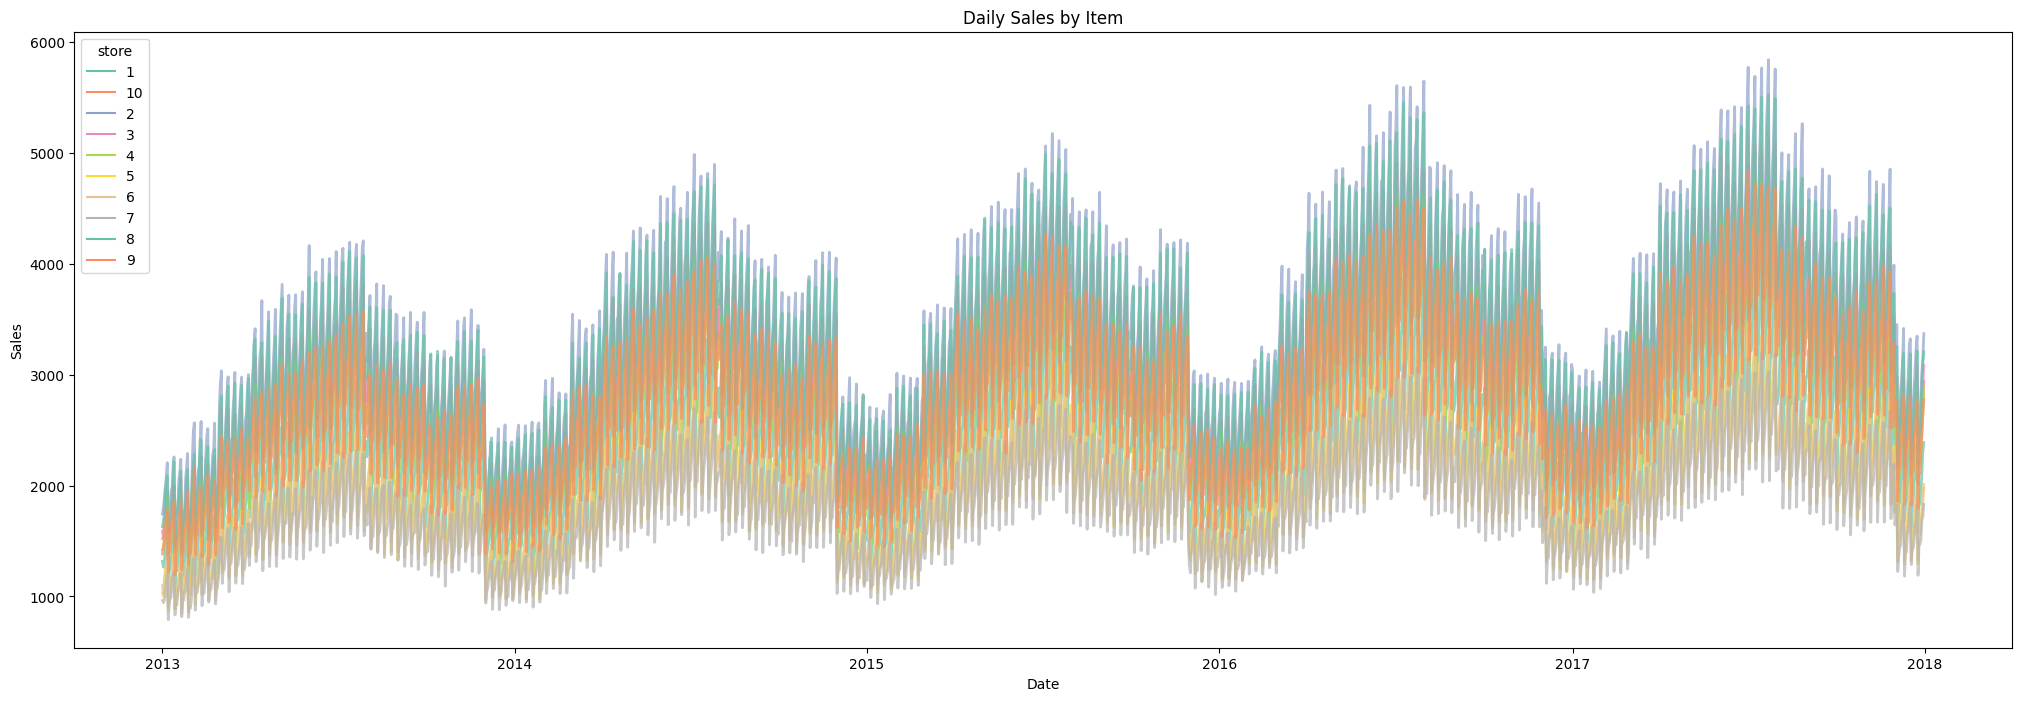

In [21]:
plt.figure(figsize = [25, 8])
sns.lineplot(x='date', y='sales', hue='store', data=df, palette='Set2', linewidth=2, alpha=0.7)
plt.title('Daily Sales by Item')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='store', loc='upper left')

## Transforming Data

In [22]:
print(df_train.shape)
df_train.head()

(913000, 4)


date store item  sales
0 2013-01-01     1    1     13
1 2013-01-02     1    1     11
2 2013-01-03     1    1     14
3 2013-01-04     1    1     13
4 2013-01-05     1    1     10

In [23]:
print(df_train.columns)

Index(['date', 'store', 'item', 'sales'], dtype='object')


In [24]:
train = df_train.copy()
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d")
train.head()

date store item  sales
0 2013-01-01     1    1     13
1 2013-01-02     1    1     11
2 2013-01-03     1    1     14
3 2013-01-04     1    1     13
4 2013-01-05     1    1     10

In [25]:
train[['store', 'item']].value_counts()

store  item
1      1       1826
6      36      1826
       48      1826
       47      1826
       46      1826
               ... 
3      2       1826
       19      1826
       18      1826
       17      1826
9      9       1826
Length: 500, dtype: int64

In [26]:
# per 1 store, 1 item
train_df = train.copy()
train_df = train_df[(train_df['store']=='1') & (train_df['item']=='1')]
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.dayofyear
train_df['weekday'] = train_df['date'].dt.weekday

train_df.head()

date store item  sales  year  month  day  weekday
0 2013-01-01     1    1     13  2013      1    1        1
1 2013-01-02     1    1     11  2013      1    2        2
2 2013-01-03     1    1     14  2013      1    3        3
3 2013-01-04     1    1     13  2013      1    4        4
4 2013-01-05     1    1     10  2013      1    5        5

In [27]:

train_df['sales'] = train_df['sales'].astype(float)

train_df.head()

date store item  sales  year  month  day  weekday
0 2013-01-01     1    1   13.0  2013      1    1        1
1 2013-01-02     1    1   11.0  2013      1    2        2
2 2013-01-03     1    1   14.0  2013      1    3        3
3 2013-01-04     1    1   13.0  2013      1    4        4
4 2013-01-05     1    1   10.0  2013      1    5        5

## Series Decomposition


Decomposing the time series into its components – trend, seasonality, and residuals – using a statsmodels function to identify any patterns occurring on a yearly or weekly basis.

## Monthly Sales Trends:

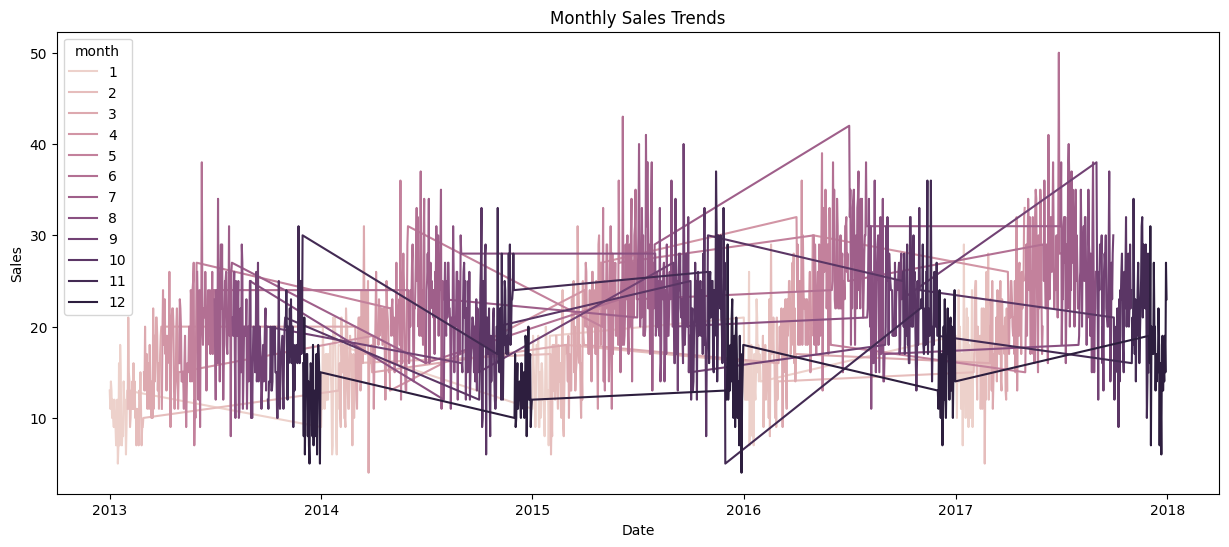

In [28]:
# Extracting month and year for better granularity
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

# Plotting monthly sales trends
plt.figure(figsize=(15, 6))
sns.lineplot(x="date", y="sales", hue="month", legend='full', data=train_df)
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Yearly Sales Trends:

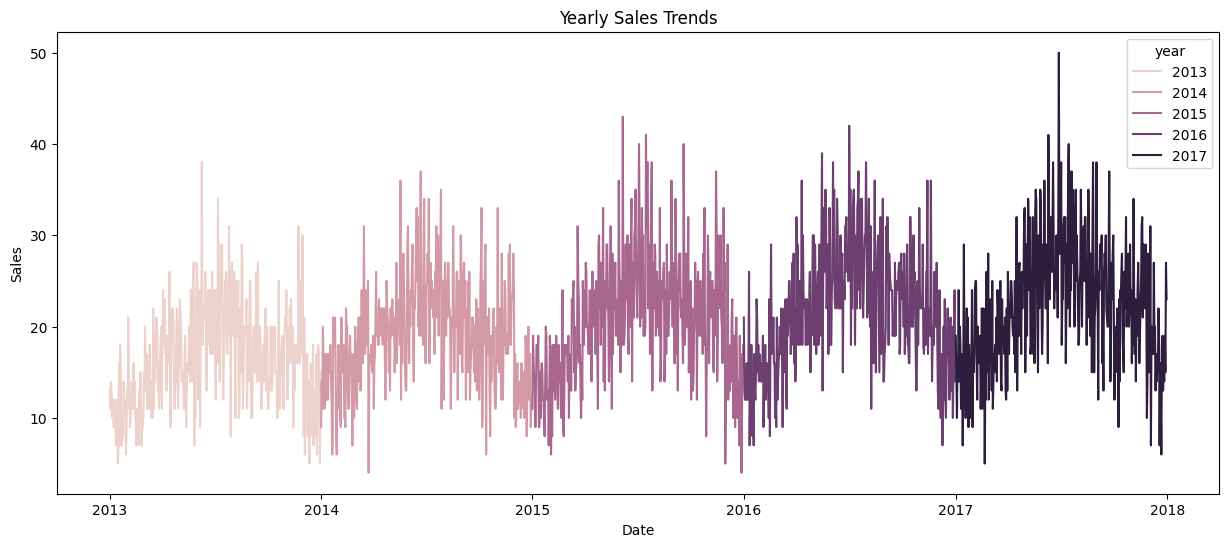

In [29]:
# Plotting yearly sales trends
plt.figure(figsize=(15, 6))
sns.lineplot(x="date", y="sales", hue="year", legend='full', data=train_df)
plt.title('Yearly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

## Outliers by Day of the Week:
Weekdays, ranging from 0 (Monday) to 6 (Sunday), exhibit smaller sales compared to the weekends (5 and 6), where higher sales are observed. Additionally, a few instances of outliers are noticed specifically on weekdays

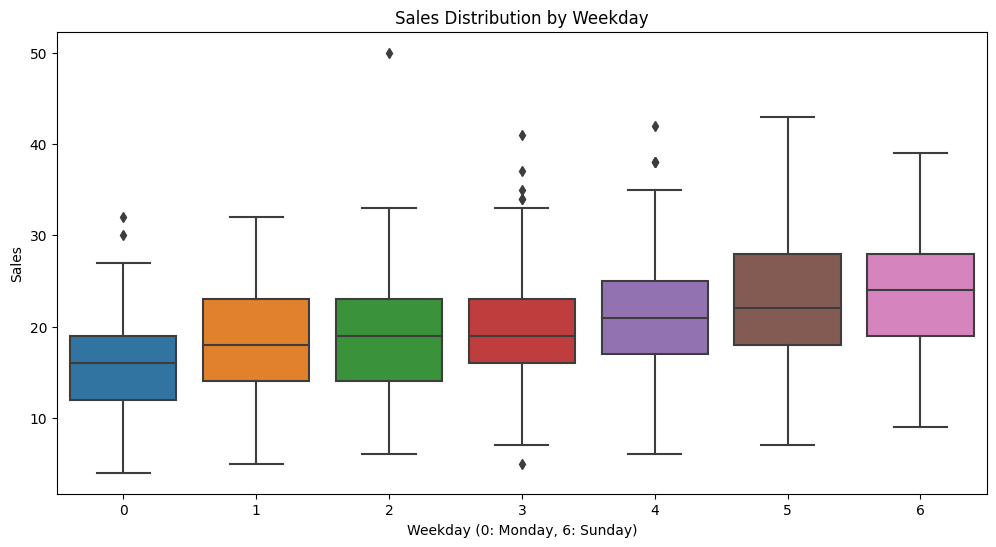

In [30]:
# Boxplot of sales by weekday to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x="weekday", y="sales", data=train_df)
plt.title('Sales Distribution by Weekday')
plt.xlabel('Weekday (0: Monday, 6: Sunday)')
plt.ylabel('Sales')
plt.show()

## Sales Distribution Over Years:
The sales showed a gradual increase each year, although the growth was not particularly significant.

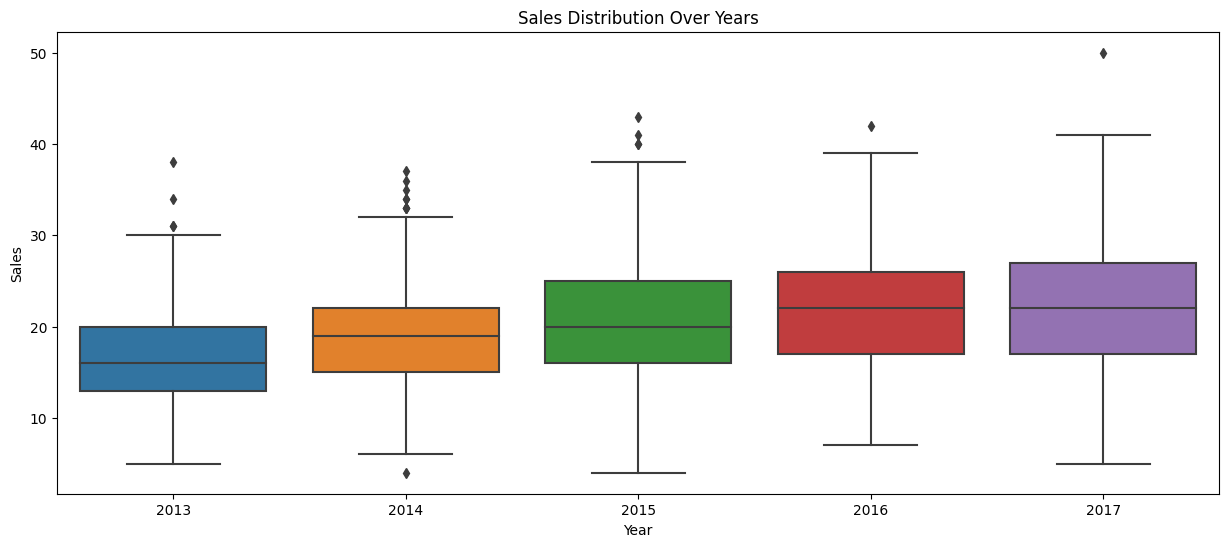

In [31]:
# Plotting sales distribution over years
plt.figure(figsize=(15, 6))
sns.boxplot(x="year", y="sales", data=train_df)
plt.title('Sales Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()


## Seasonal Decomposition

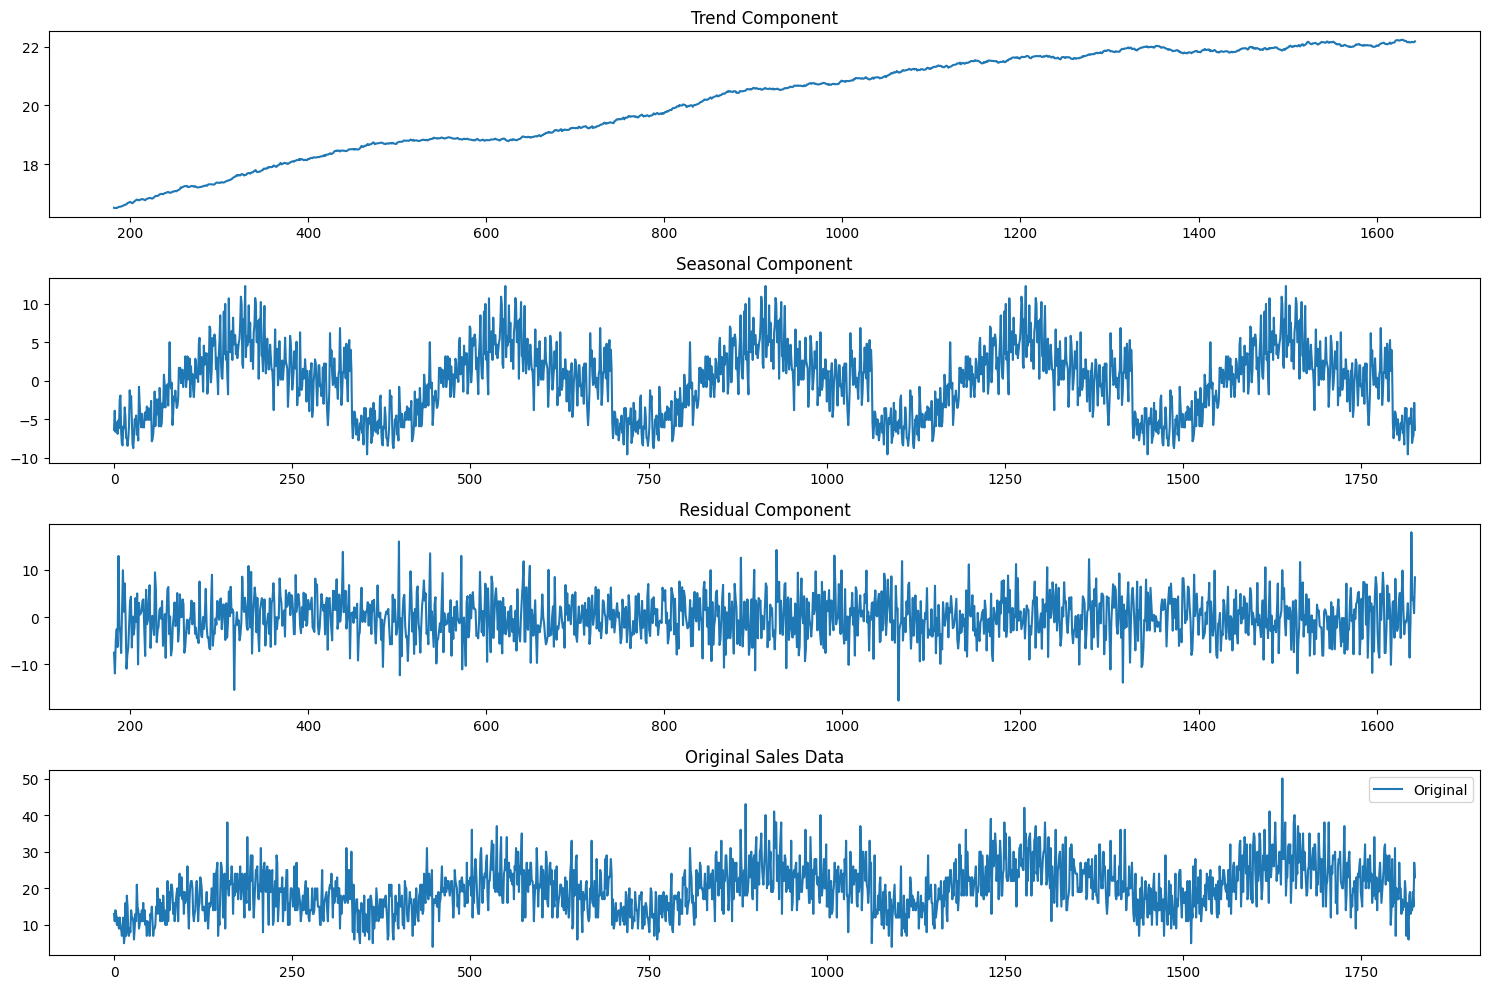

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['sales'], model='additive', period=365)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual Component')

plt.subplot(4, 1, 4)
plt.plot(train_df['sales'], label='Original')
plt.legend()
plt.title('Original Sales Data')

plt.tight_layout()
plt.show()


In [33]:
train_df.head()

date store item  sales  year  month  day  weekday
0 2013-01-01     1    1   13.0  2013      1    1        1
1 2013-01-02     1    1   11.0  2013      1    2        2
2 2013-01-03     1    1   14.0  2013      1    3        3
3 2013-01-04     1    1   13.0  2013      1    4        4
4 2013-01-05     1    1   10.0  2013      1    5        5

## Stationarizing Data

In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

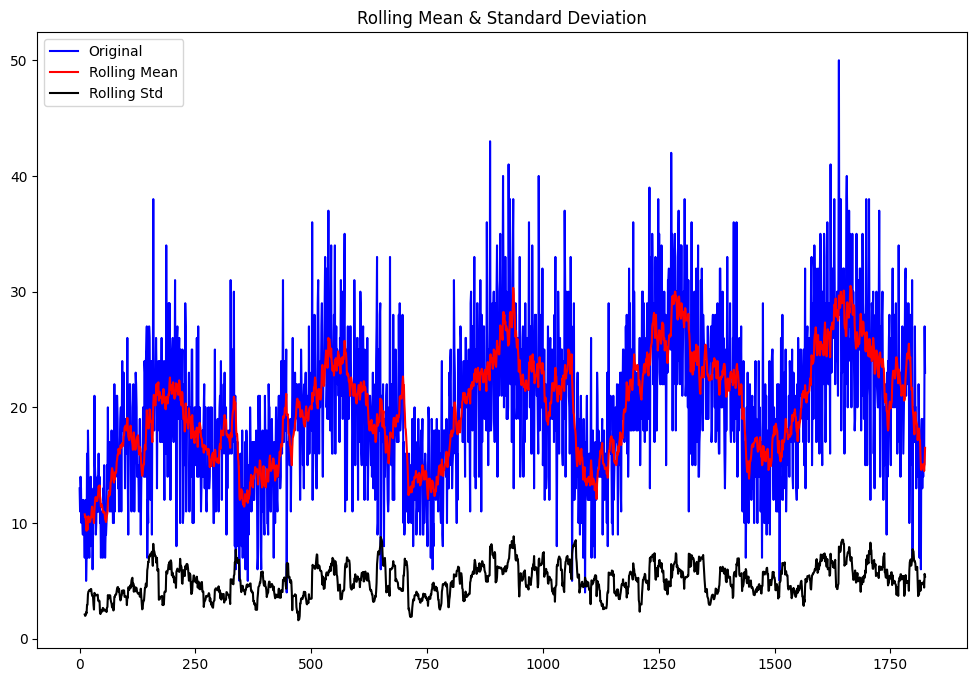

Results of Dickey-Fuller Test:
p-value = 0.0361. The series is likely non-stationary.
Test Statistic                   -2.987278
p-value                           0.036100
#Lags Used                       20.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [35]:
train_df.set_index('date', inplace=False)

# Call the function to test stationarity
test_stationarity(train_df['sales'])

The obtained p-value is 0.036, which is relatively good. If we employ a 5% Critical Value (CV), the series would be deemed stationary. However, due to the observed upward trend, we opt for a 1% CV to be sure.

### Using log, defferencing method to make the series stationary
The shift(1) function is used to obtain the time series of first differences.

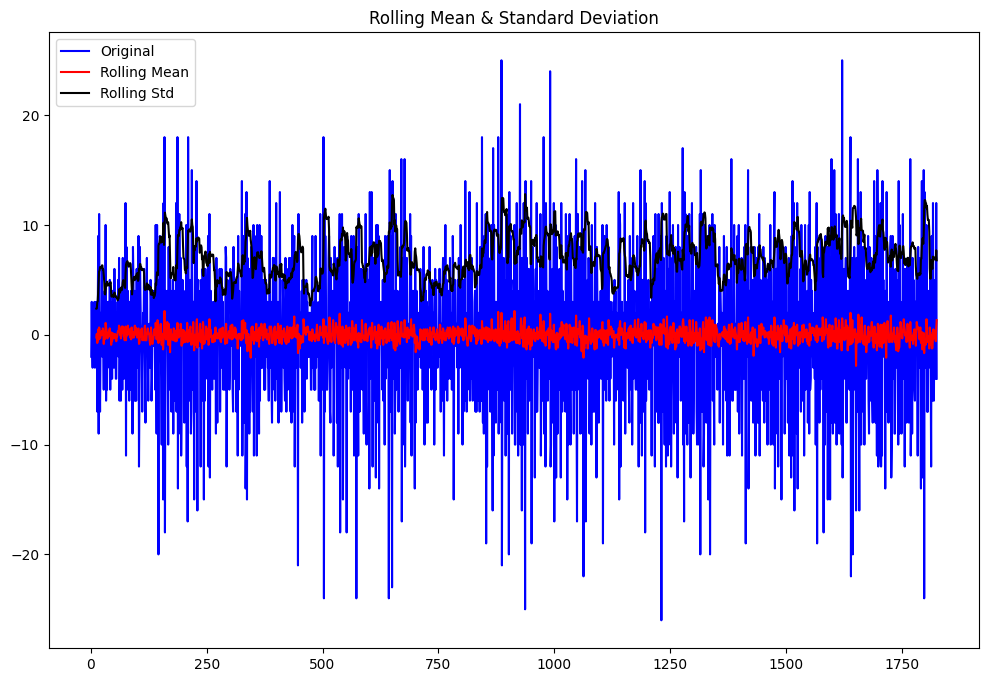

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.520810e+01
p-value                        5.705031e-28
#Lags Used                     2.000000e+01
Number of Observations Used    1.804000e+03
Critical Value (1%)           -3.433980e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567624e+00
dtype: float64


In [36]:
# Calculate the first difference of the 'sales' column
first_diff = train_df.sales - train_df.sales.shift(1)
first_diff = first_diff.dropna(inplace=False)

# Test stationarity for the first difference
test_stationarity(first_diff, window=12)


After differencing, the extremely low p-value from the Augmented Dickey-Fuller test strongly supports the idea that the transformed series is actually stationary.

## ACF and PACF

### ACF and PACF on train_df

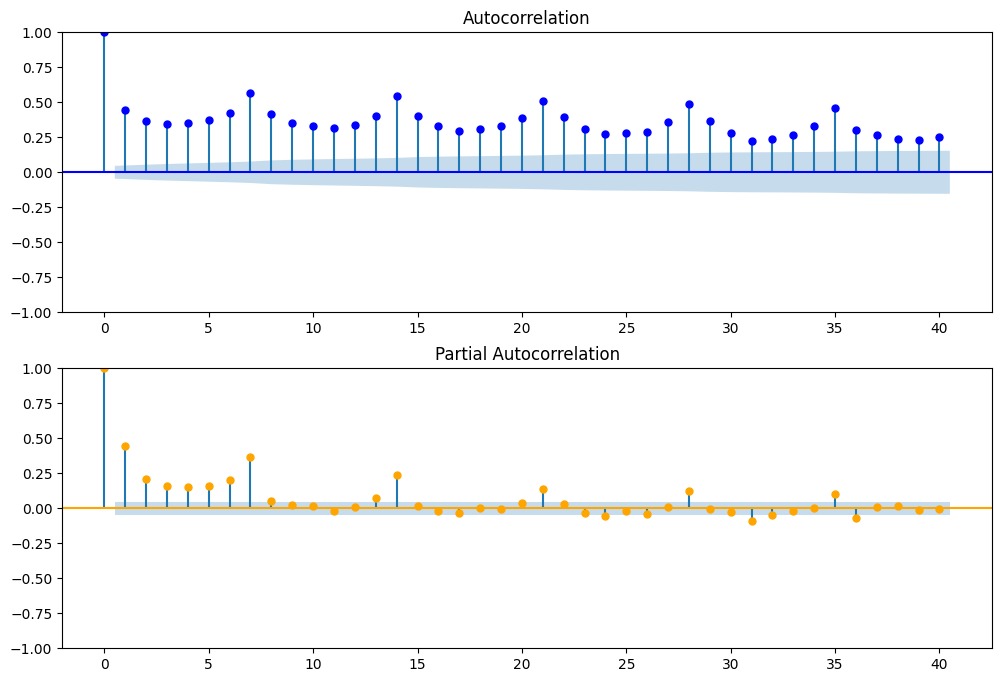

In [37]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.sales, lags=40, ax=ax1,color='blue')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.sales, lags=40, ax=ax2,color='orange')

### ACF and PACF on first diff

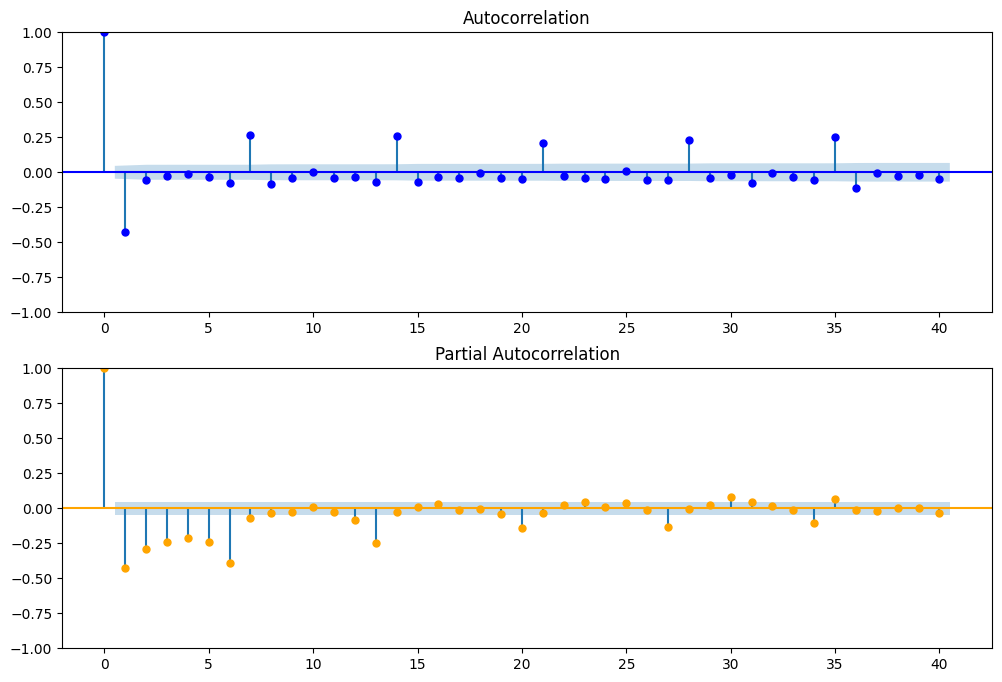

In [38]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1, color='blue')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2, color='orange')


Both the ACF and PACF plots exhibit a repetitive pattern every 7 periods, suggesting a weekly trend. This observation indicates the presence of seasonality in the time series.

Considering this, applying a Seasonal AutoRegressive Integrated Moving Average (SARIMA) model is good.

## Modeling ARIMA
First order differencing make the ts stationary, I = 1
Within 6 lags the AR is significant, So AR = 6

In [39]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima.model.ARMA',
                        FutureWarning)


arima_mod6 = ARIMA(train_df['sales'], order=(6, 1, 0)).fit()
#round(model_fit.params,2)
print(arima_mod6.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -5597.679
Date:                Tue, 28 Nov 2023   AIC                          11209.359
Time:                        23:32:46   BIC                          11247.924
Sample:                             0   HQIC                         11223.585
                               - 1826                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8174      0.021    -39.063      0.000      -0.858      -0.776
ar.L2         -0.7497      0.025    -30.480      0.000      -0.798      -0.702
ar.L3         -0.6900      0.026    -26.686      0.0

NormaltestResult(statistic=16.742690147718932, pvalue=0.00023140408872260922)


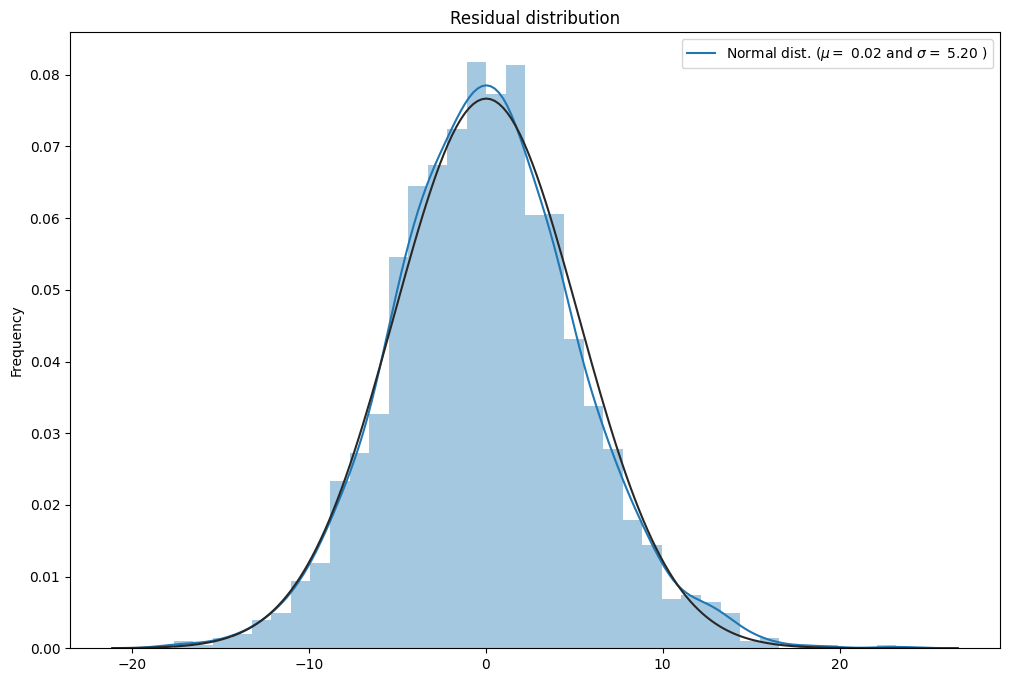

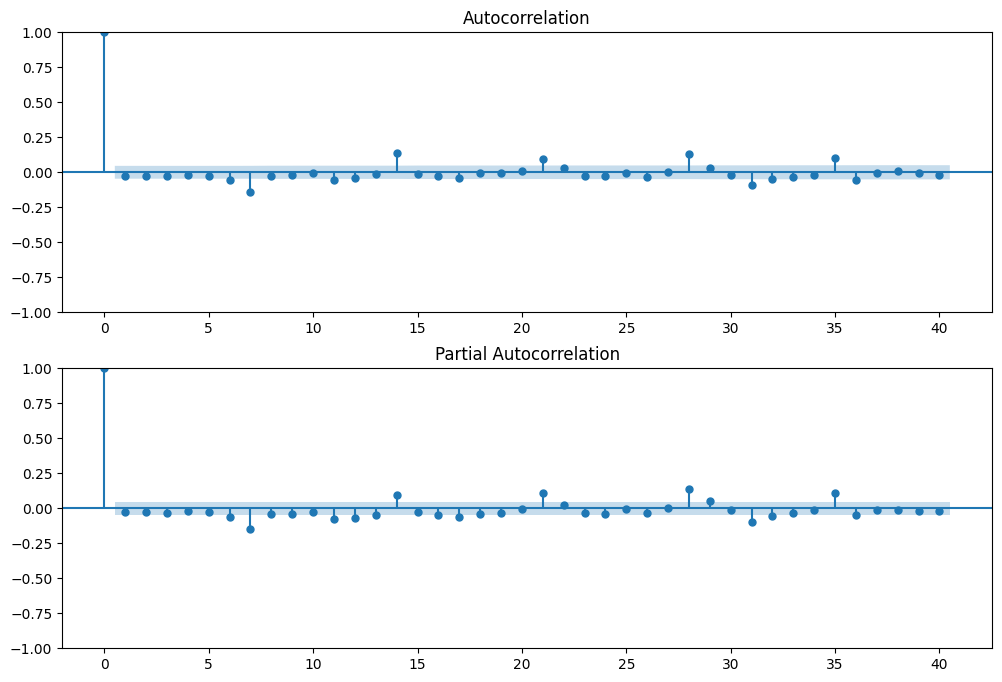

In [40]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod6.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)
#Now plot the distribution using
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

While the graph visually appears to follow a normal distribution, it does not pass the statistical test. Additionally, there is an observable repeating correlation in both the AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF). we need to see seasonality

## Prediction and evaluation

Taking the last 30 days in training set as validation data



<Axes: >

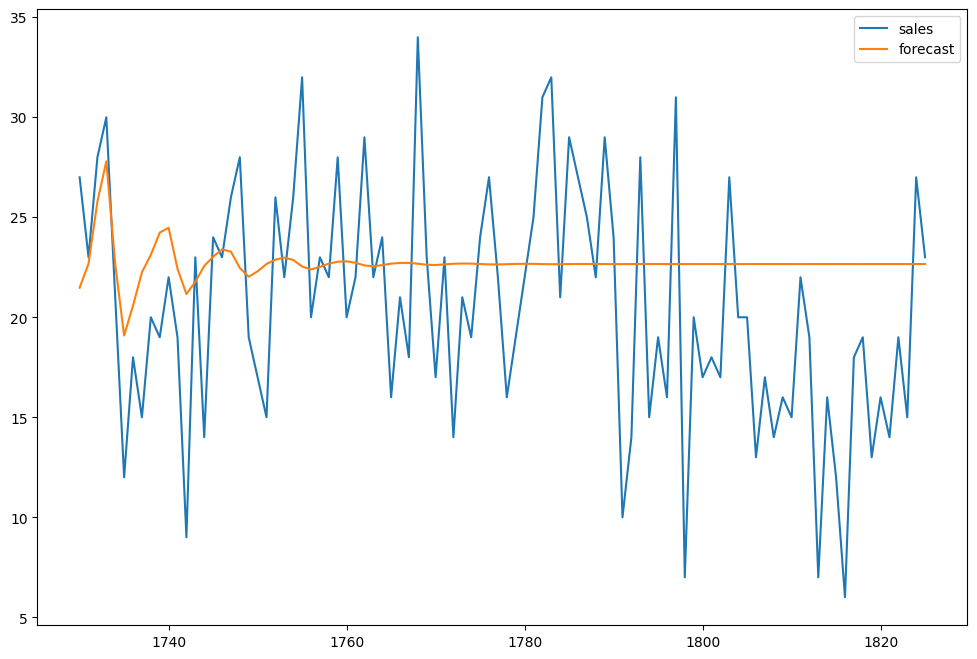

In [41]:
start_index = 1730
end_index = 1826
train_df['forecast'] = arima_mod6.predict(start = start_index, end= end_index, dynamic= True)
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

In [42]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [43]:
smape_kun(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])

MAPE: 33.01 % 
SMAPE: 25.07 %


In [44]:
rmse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'], squared=False)
print('RMSE: %.2f' % rmse)

# calculate MSE
mse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MSE: %.2f' % mse)

# calculate MAE
mae = mean_absolute_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MAE: %.2f' % mae)

RMSE: 6.15
MSE: 37.81
MAE: 4.96


## Forcasting next 4 months

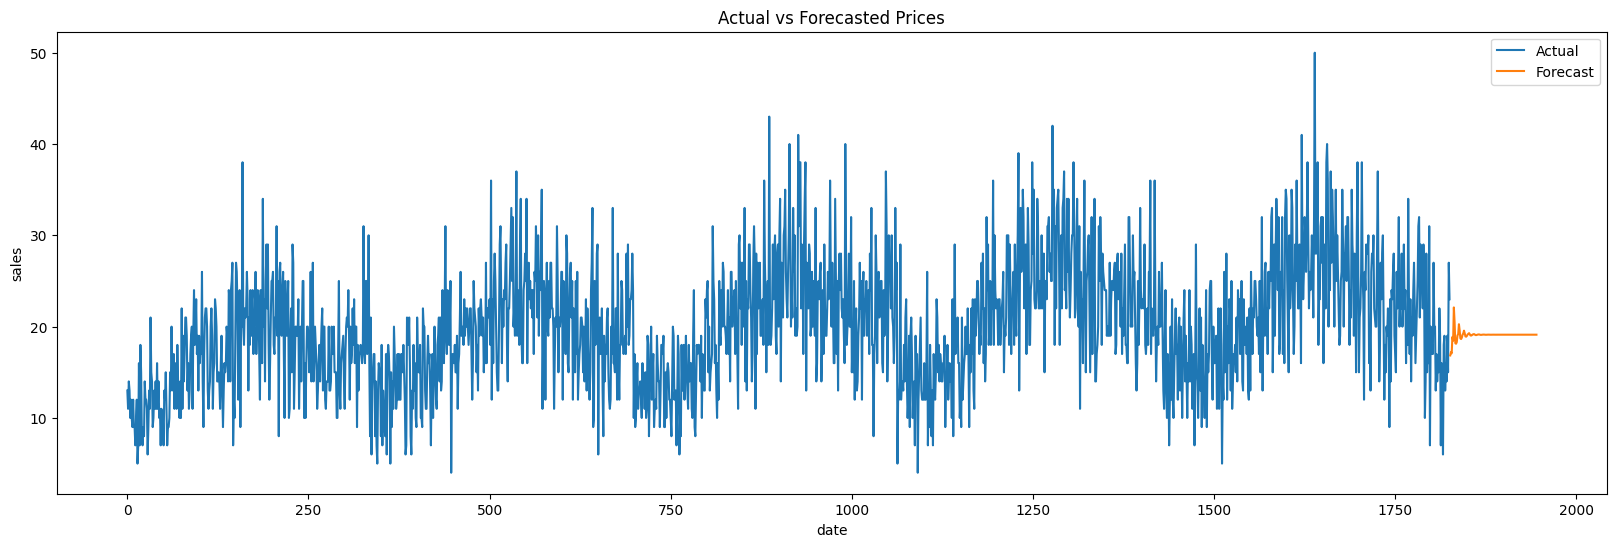

In [45]:
# Forecast prices for next 4 months
forecast = arima_mod6.forecast(steps=4*30)

# Concatenate train data and forecast
combined_data = pd.concat([train_df, forecast])

# Plot actual vs forecasted prices
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(combined_data.index, combined_data["sales"], label="Actual")
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Actual vs Forecasted Prices")
ax.legend()
plt.show()

## SARIMA model

In [46]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_df['sales'], order=(1, 1, 1), seasonal_order=(7, 1, 6, 12)).fit()
print(sarima_mod6.summary())

                                              SARIMAX Results                                              
Dep. Variable:                                               sales   No. Observations:                 1826
Model:             SARIMAX(1, 1, 1)x(7, 1, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood               -5495.934
Date:                                             Tue, 28 Nov 2023   AIC                          11023.868
Time:                                                     23:40:29   BIC                          11111.911
Sample:                                                          0   HQIC                         11056.356
                                                            - 1826                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

NormaltestResult(statistic=13.339968141148766, pvalue=0.0012684189560317218)


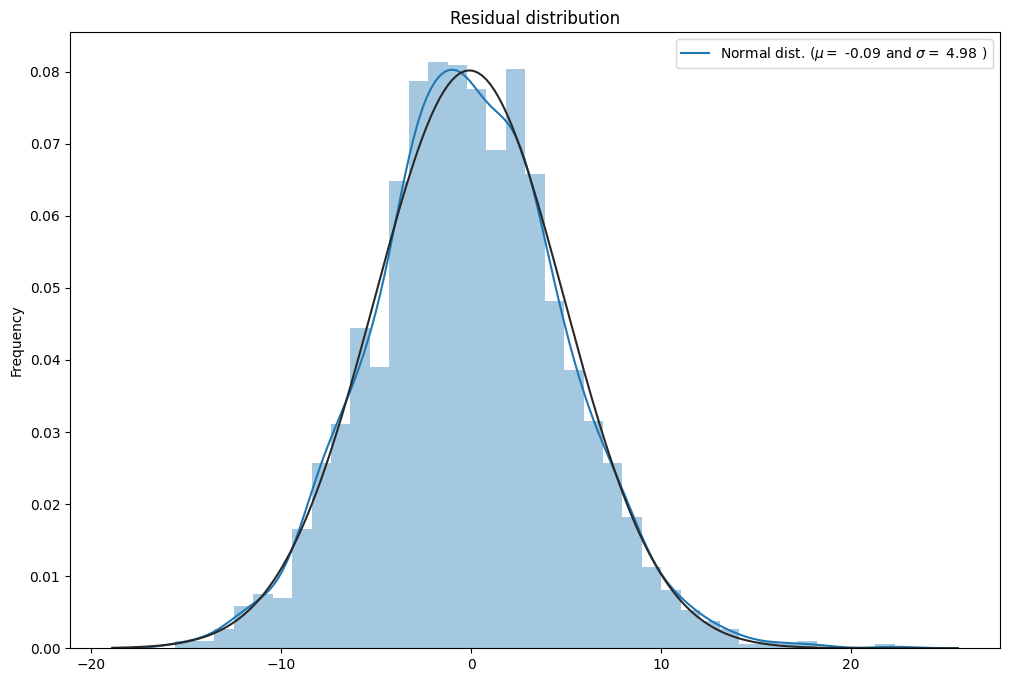

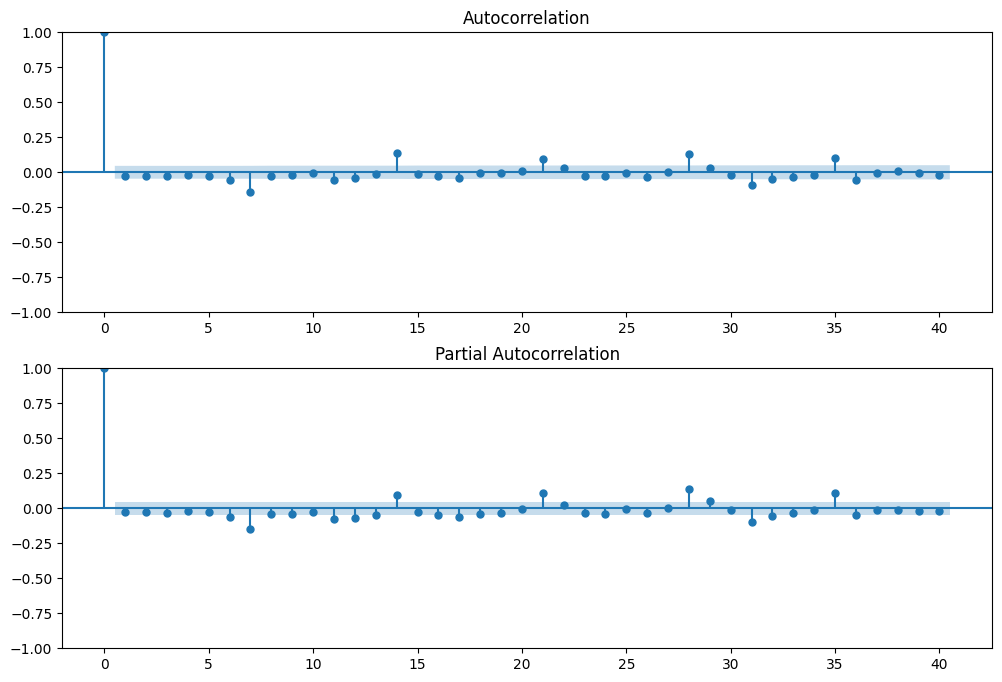

In [47]:
resid = sarima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

## Prediction and evaluation

<Axes: >

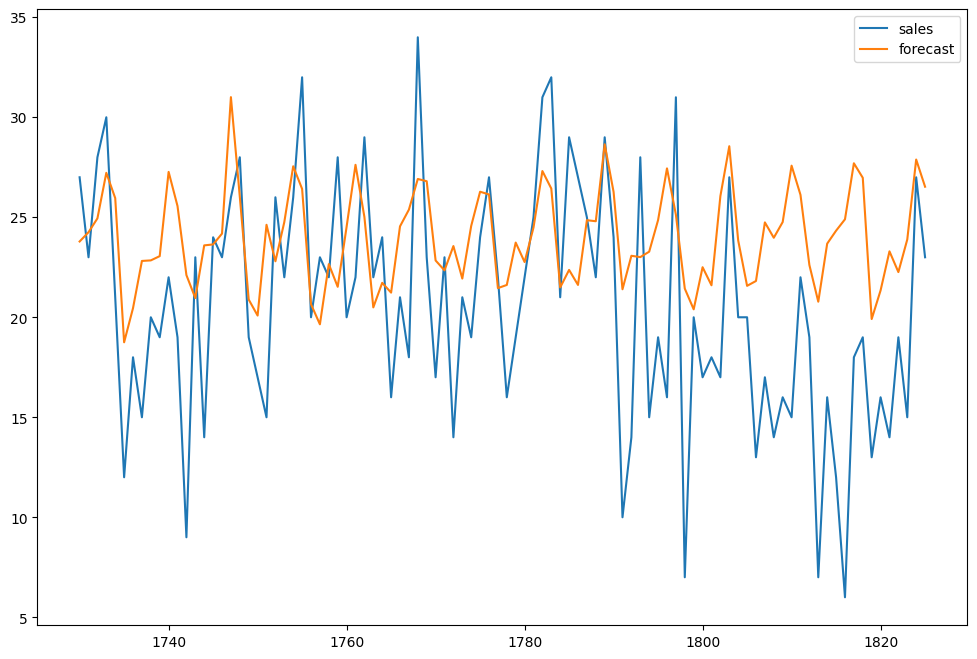

In [48]:
start_index = 1730
end_index = 1826
train_df['forecast'] = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

In [49]:
smape_kun(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])

MAPE: 34.89 % 
SMAPE: 25.74 %


In [50]:
rmse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'], squared=False)
print('RMSE: %.2f' % rmse)

# calculate MSE
mse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MSE: %.2f' % mse)

# calculate MAE
mae = mean_absolute_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MAE: %.2f' % mae)

RMSE: 6.40
MSE: 40.90
MAE: 5.17


## Forecasting Next 4 months of data

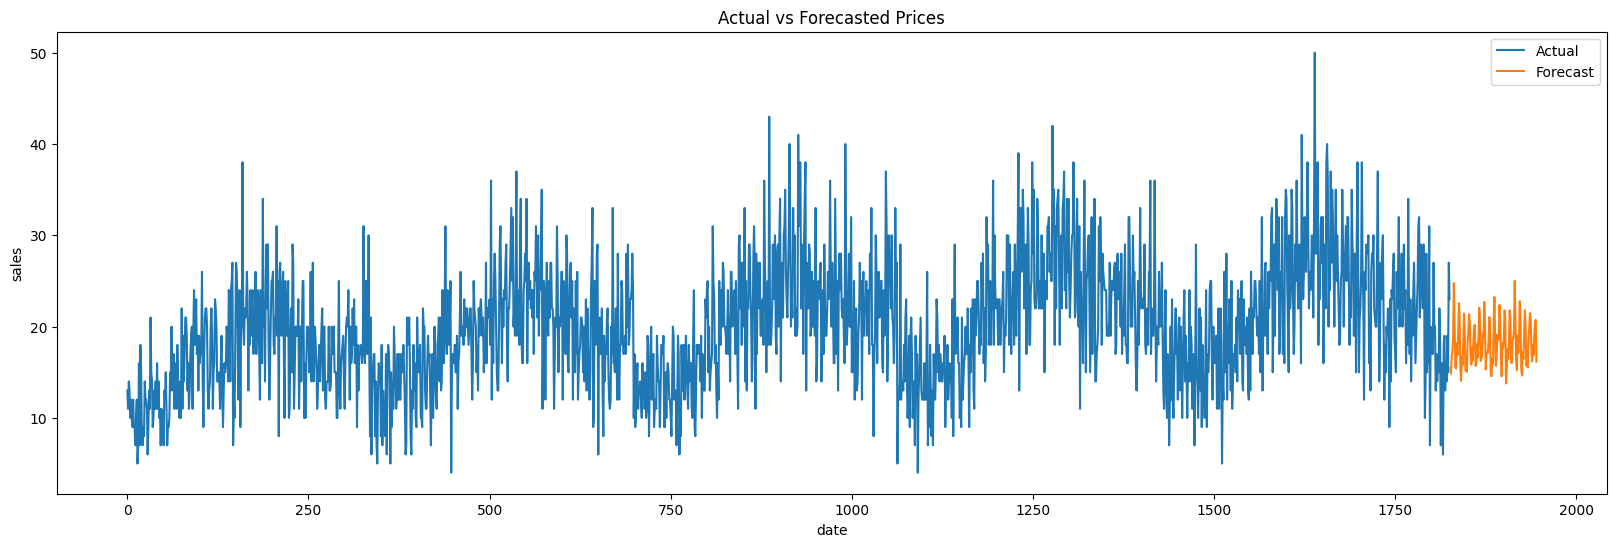

In [51]:
# Forecast prices for next 4 months
forecast = sarima_mod6.forecast(steps=4*30)

# Concatenate train data and forecast
combined_data = pd.concat([train_df, forecast])

# Plot actual vs forecasted prices
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(combined_data.index, combined_data["sales"], label="Actual")
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Actual vs Forecasted Prices")
ax.legend()
plt.show()

## Hyperparameter tune  ARIMA

In [52]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
# Define parameter ranges for auto-ARIMA
auto_arima_params = {
    'start_p': 0,
    'start_d': 0,
    'start_q': 0,
    'max_p': 10,
    'max_d': 5,
    'max_q': 10,
    'seasonal': False,
    'stepwise': True,
    'suppress_warnings': True,
    'error_action': 'ignore'
}

# Use auto-ARIMA to find optimal hyperparameters
optimal_model = pm.auto_arima(train_df['sales'], **auto_arima_params)

# Fit ARIMA model with selected hyperparameters
arima_model = ARIMA(train_df['sales'], order=optimal_model.order)
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1826
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -5572.990
Date:                Tue, 28 Nov 2023   AIC                          11163.980
Time:                        23:41:18   BIC                          11213.564
Sample:                             0   HQIC                         11182.271
                               - 1826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0448      0.037      1.215      0.224      -0.027       0.117
ar.L2         -0.0597      0.032     -1.841      0.066      -0.123       0.004
ar.L3         -0.0665      0.032     -2.072      0.038      -0.129      -0.004
ar.L4         -0.0488      0.032     -1.508      0.131      -0.112       0.015
ar.L5         -0.0317      0.031     -1.022      0.307      -0.092       0.029
ar.L6          0.0199      0.029      0.684      0.494      -0.037       0.077
ar.L7          0.2757      0.028      9.861      0.000       0.221       0.331
ma.L1         -0.9143      0.025    -36.138      0.000      -0.964      -0.865
sigma2        26.2645      0.811     32.372      0.000      24.674      27.855
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

NormaltestResult(statistic=13.425420916365283, pvalue=0.0012153654589205209)


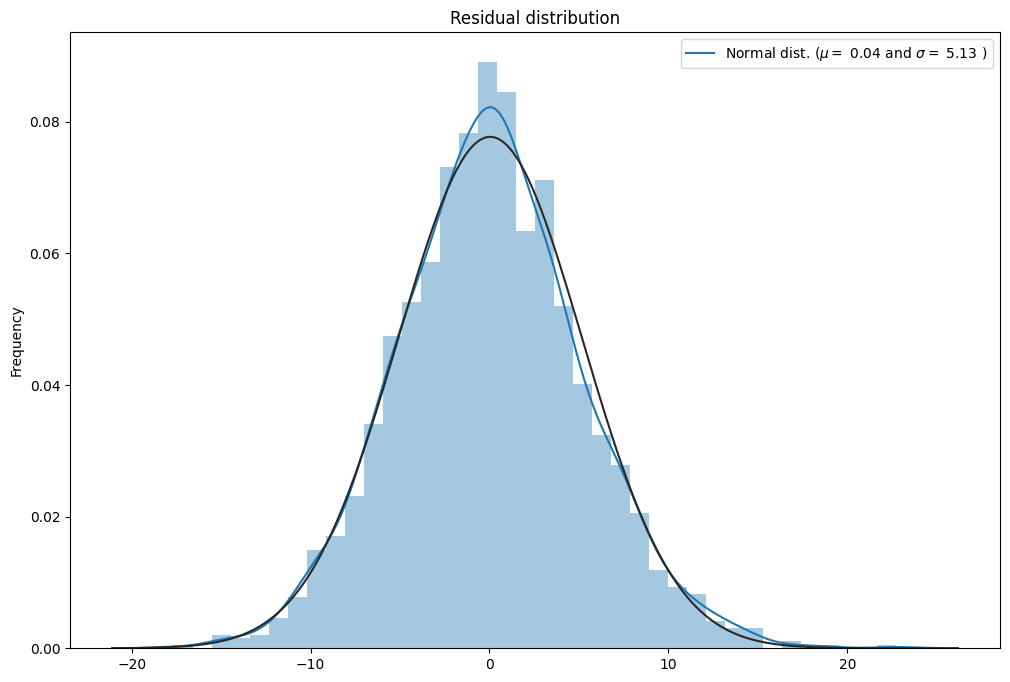

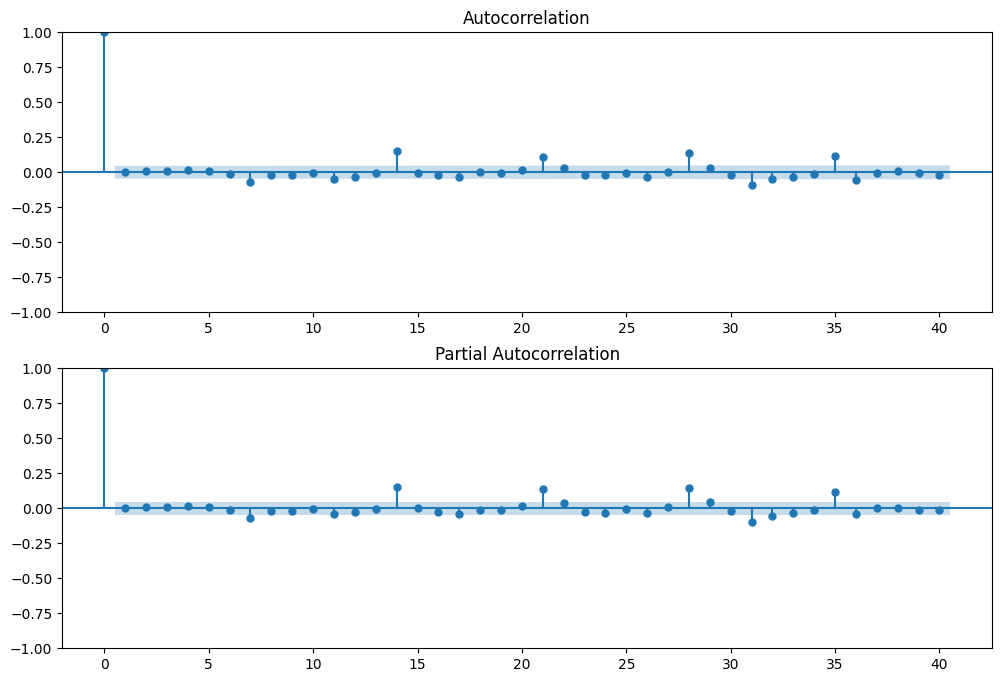

In [53]:
resid = arima_model_fit.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_model_fit.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_model_fit.resid, lags=40, ax=ax2)

<Axes: >

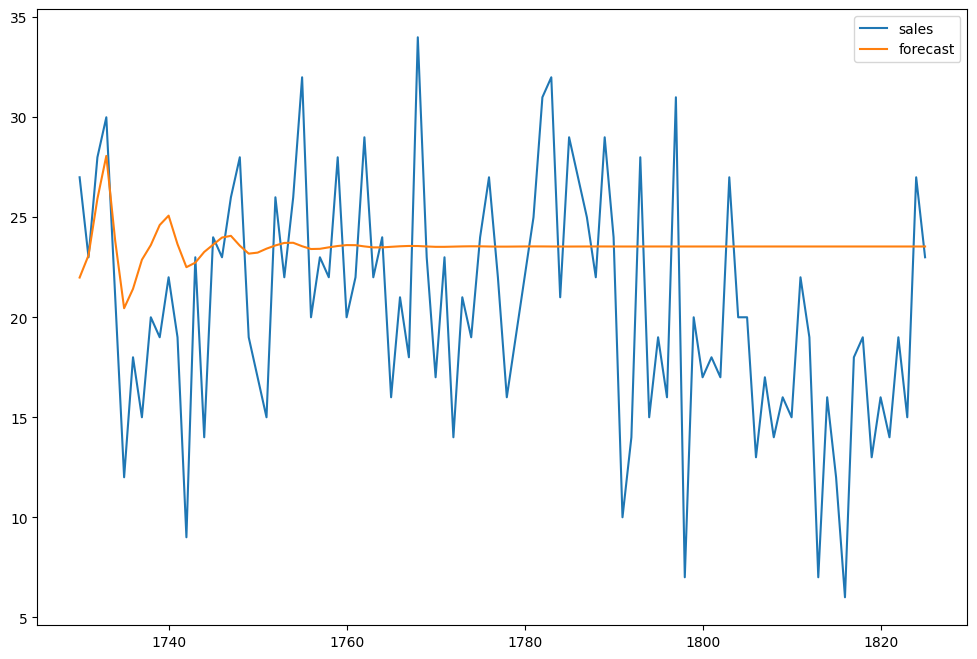

In [54]:
# Predictions
start_index = 1730
end_index = 1826
train_df['forecast'] = arima_model_fit.predict(start = start_index, end= end_index, dynamic= True)
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

In [55]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")
smape_kun(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])

MAPE: 35.83 % 
SMAPE: 26.46 %


In [56]:
rmse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'], squared=False)
print('RMSE: %.2f' % rmse)

# calculate MSE
mse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MSE: %.2f' % mse)

# calculate MAE
mae = mean_absolute_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MAE: %.2f' % mae)

RMSE: 6.52
MSE: 42.56
MAE: 5.30


## Hyperparameter tune SARIMAX

In [57]:
# Hyperparameter tuning using auto_arima
optimal_model = pm.auto_arima(train_df['sales'], seasonal=True, m=12,
                           start_p=1, start_q=1, start_d = 1, max_p=2, max_q=2, max_d = 1,
                           start_P=7, start_Q=6, start_D = 1, max_P=8, max_Q=7, max_D = 1,
                           error_action='ignore', suppress_warnings=True,
                           stepwise=True, random_state=42, n_fits=50)


# Use auto-SARIMAX to find optimal hyperparameters
# Fit SARIMAX model with selected hyperparameters
sarimax_model = sm.tsa.statespace.SARIMAX(train_df.sales, order=optimal_model.order, seasonal_order=optimal_model.seasonal_order, exog=None)
sarimax_model_fit = sarimax_model.fit()

In [58]:
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                 1826
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -5647.306
Date:                             Tue, 28 Nov 2023   AIC                          11306.613
Time:                                     23:51:02   BIC                          11339.669
Sample:                                          0   HQIC                         11318.807
                                            - 1826                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0327      0.027      1.232      0.218      -0.019       0.085
ar.L2         -0.0722      0.026     -2.831      0.005      -0.122      -0.022
ma.L1         -0.8988      0.013    -69.966      0.000      -0.924      -0.874
ar.S.L12      -0.0617      0.023     -2.645      0.008      -0.108      -0.016
ar.S.L24      -0.1201      0.024     -5.096      0.000      -0.166      -0.074
sigma2        28.4964      0.872     32.696      0.000      26.788      30.205
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                16.13
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

NormaltestResult(statistic=13.917196665537606, pvalue=0.0009504278248756773)


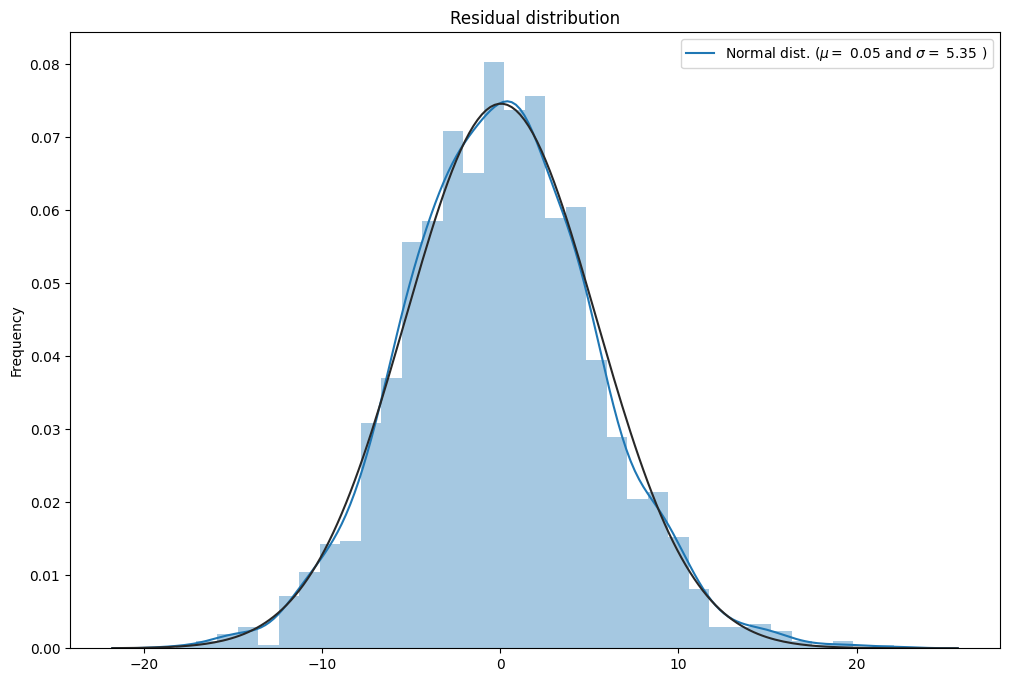

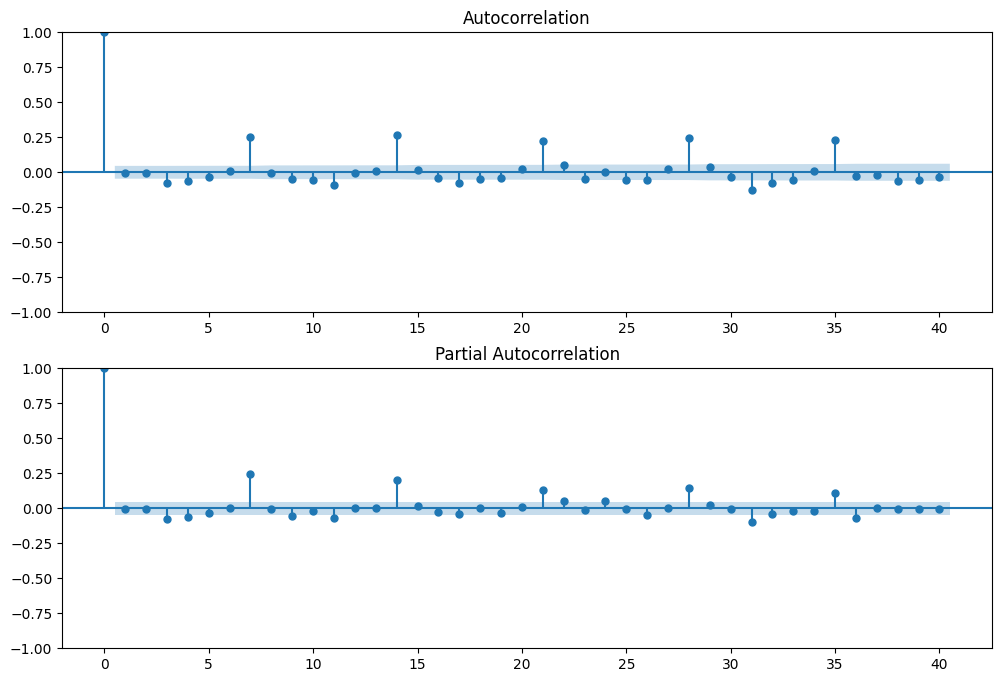

In [59]:
from scipy import stats
from scipy.stats import normaltest

resid = sarimax_model_fit.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')
# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimax_model_fit.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimax_model_fit.resid, lags=40, ax=ax2)

<Axes: >

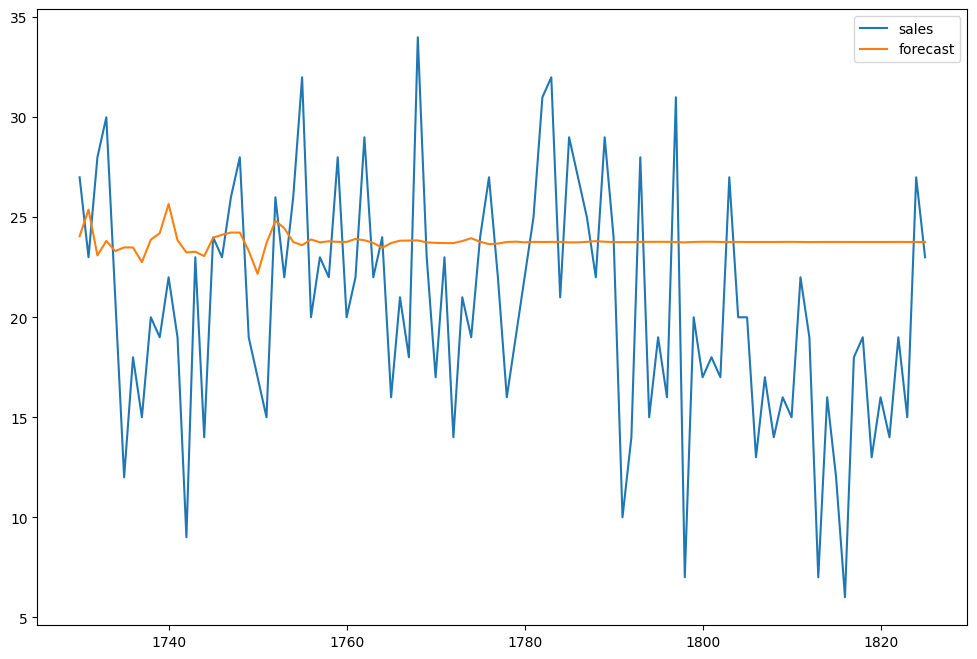

In [60]:
# Predictions
start_index = 1730
end_index = 1826
train_df['forecast'] = sarimax_model_fit.predict(start = start_index, end= end_index, dynamic= True)
train_df[start_index:end_index][['sales', 'forecast']].plot(figsize=(12, 8))

In [61]:
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")
smape_kun(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])

MAPE: 37.12 % 
SMAPE: 27.25 %


In [62]:
rmse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'], squared=False)
print('RMSE: %.2f' % rmse)

# calculate MSE
mse = mean_squared_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MSE: %.2f' % mse)

# calculate MAE
mae = mean_absolute_error(train_df[1730:1825]['sales'],train_df[1730:1825]['forecast'])
print('MAE: %.2f' % mae)

RMSE: 6.71
MSE: 45.05
MAE: 5.50


## Forecasting next 4 months of data using tuned ARIMA and SARIMA models

### Tuned ARIMA

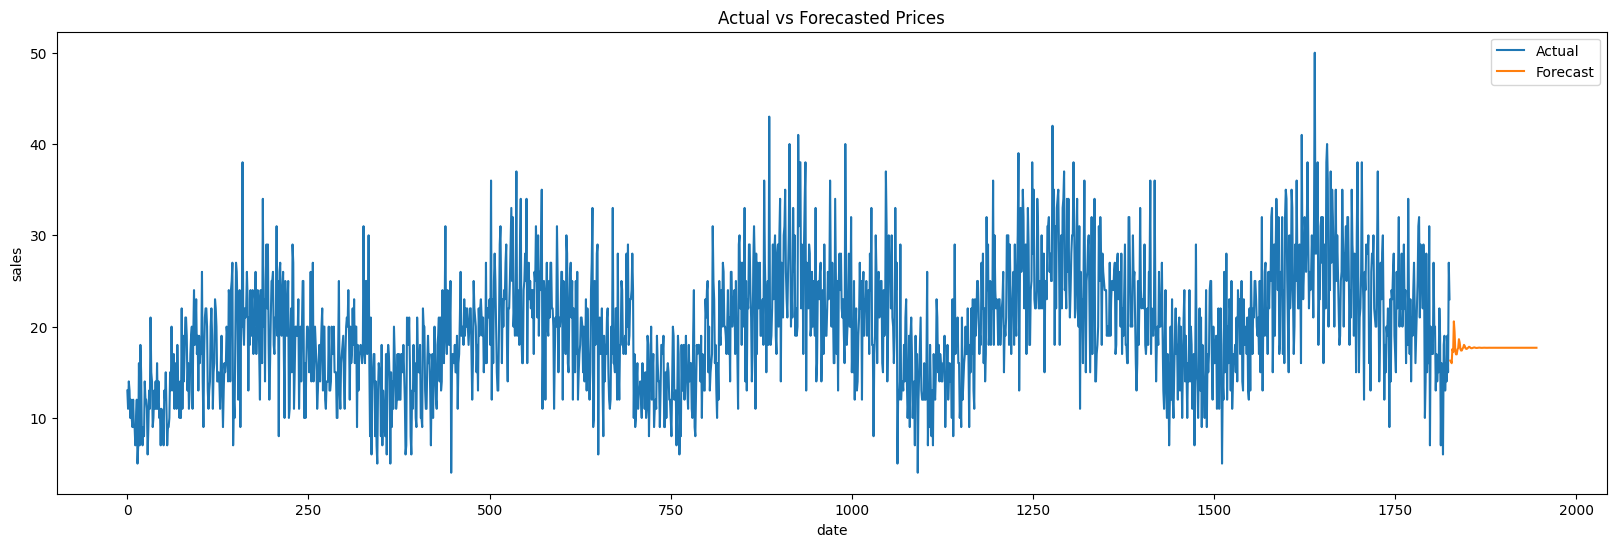

In [63]:
# Forecast prices for next 4 months
forecast = arima_model_fit.forecast(steps=4*30)

# Concatenate train data and forecast
combined_data = pd.concat([train_df, forecast])

# Plot actual vs forecasted prices
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(combined_data.index, combined_data["sales"], label="Actual")
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Actual vs Forecasted Prices")
ax.legend()
plt.show()

### Tuned SARIMA

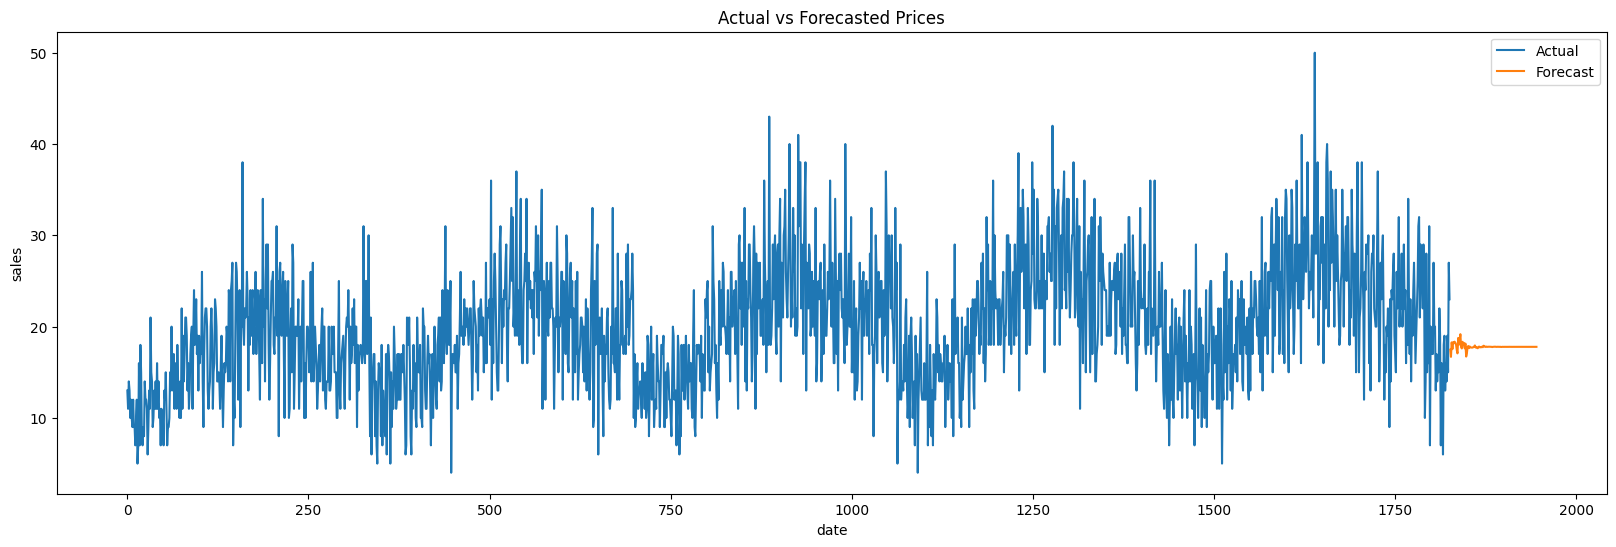

In [65]:
# Forecast prices for next 4 months
forecast = sarimax_model_fit.forecast(steps=4*30)

# Concatenate train data and forecast
combined_data = pd.concat([train_df, forecast])

# Plot actual vs forecasted prices
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(combined_data.index, combined_data["sales"], label="Actual")
ax.plot(forecast.index, forecast, label="Forecast")
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_title("Actual vs Forecasted Prices")
ax.legend()
plt.show()